


# **Importing Required Libraries**



In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn
from datetime import datetime
import matplotlib.pyplot as plt
! pip install mplfinance
import mplfinance as mpf
from google.colab import drive
import sklearn
from sklearn import model_selection
import random
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.1 MB/s eta 0:00:00


# **1- Data Acquisition and Preprocessing**



## **1.1 Data Downloading**

In [ ]:
# Downloading the initial dataset using ' yahoo finance'
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table[0]


Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North Chicago, Illinois   
3                                   Biotechnology  North Chicago, Illinois   
4                  IT Consulting & Other Services          Dublin, Ireland   
..                                            ...                      ...   
498  Industrial Machinery & Supplies & Components   White Plains, New York   
499                                   Restaurants     Louisville, Kentucky   
500            Electronic Equipment & Instruments   Lincolnshire, Illinois   
501                         Health Care Equipment          Warsaw, Indiana   
502                               Pharmaceuticals   Parsippany, New Jersey   

     Date added      CIK      Founded  
0    1957-03-04    66740         1902  
1    2017-07-26    91142         1916  
2    1957-03-04     1800         1888  
3    2012-12-31  1551152  2013 (1888)  
4    2011-07-06  1467373         1989  
..          ...      ...          ...  
498  2011-11-01  1524472         2011  
499  1997-10-06  1041061         1997  
500  2019-12-23   877212         1969  
501  2001-08-07  1136869         1927  
502  2013-06-21  1555280         1952  

[503 rows x 8 columns]

In [ ]:
table[0]['Date added']

0      1957-03-04
1      2017-07-26
2      1957-03-04
3      2012-12-31
4      2011-07-06
          ...    
498    1997-10-06
499    2019-12-23
500    2001-08-07
501    2001-06-22
502    2013-06-21
Name: Date added, Length: 503, dtype: object

In [ ]:
# in this part the stocks whcih has data available from 2010 will be seperated and others are excluded.
table_1 = table[0]
new_table = table_1[ [ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010, 1, 1) for dt in table_1['Date added']]]
new_table

# datetime.strptime(dt.strftime('%Y-%m-%d'), '%Y-%m-%d')

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
2      ABT                Abbott             Health Care   
5     ADBE            Adobe Inc.  Information Technology   
7      AES       AES Corporation               Utilities   
8      AFL                 Aflac              Financials   
..     ...                   ...                     ...   
495   WYNN          Wynn Resorts  Consumer Discretionary   
496    XEL           Xcel Energy               Utilities   
498    YUM           Yum! Brands  Consumer Discretionary   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
2                           Health Care Equipment  North Chicago, Illinois   
5                            Application Software     San Jose, California   
7    Independent Power Producers & Energy Traders      Arlington, Virginia   
8                         Life & Health Insurance        Columbus, Georgia   
..                                            ...                      ...   
495                              Casinos & Gaming         Paradise, Nevada   
496                               Multi-Utilities   Minneapolis, Minnesota   
498                                   Restaurants     Louisville, Kentucky   
500                         Health Care Equipment          Warsaw, Indiana   
501                                Regional Banks     Salt Lake City, Utah   

     Date added      CIK Founded  
0    1957-03-04    66740    1902  
2    1957-03-04     1800    1888  
5    1997-05-05   796343    1982  
7    1998-10-02   874761    1981  
8    1999-05-28     4977    1955  
..          ...      ...     ...  
495  2008-11-14  1174922    2002  
496  1957-03-04    72903    1909  
498  1997-10-06  1041061    1997  
500  2001-08-07  1136869    1927  
501  2001-06-22   109380    1873  

[290 rows x 8 columns]

In [ ]:
# put the Symbol names in a list
My_tickers = new_table['Symbol'].tolist()
My_tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'BF.B',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 '

In [ ]:
# Download historical stock price data
# for each stock from January 1, 2010, to the present day using Yahoo Finance.
raw_price_for_my_tickers = yf.download(tickers=My_tickers, start="2010-01-04", interval="1d", group_by='ticker')


[*********************100%%**********************]  290 of 290 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-04 -> 2023-12-18)')


In [ ]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
raw_price_for_my_tickers


ROK                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   47.610001   47.959999   47.009998   47.730000   35.636185   
2010-01-05   47.650002   47.820000   47.139999   47.349998   35.352463   
2010-01-06   47.349998   48.279999   47.230000   48.250000   36.024414   
2010-01-07   48.220001   48.869999   47.799999   48.779999   36.420143   
2010-01-08   48.630001   49.509998   48.349998   49.459999   36.927837   
...                ...         ...         ...         ...         ...   
2023-12-12  280.709991  285.510010  279.480011  283.690002  283.690002   
2023-12-13  284.299988  291.269989  282.790009  290.970001  290.970001   
2023-12-14  295.000000  307.190002  292.769989  306.850006  306.850006   
2023-12-15  306.170013  309.790009  303.809998  304.369995  304.369995   
2023-12-18  304.739990  306.529999  301.820007  304.174988  304.174988   

                             BA                                      \
             Volume        Open        High         Low       Close   
Date                                                                  
2010-01-04   904000   55.720001   56.389999   54.799999   56.180000   
2010-01-05   964900   56.250000   58.279999   56.000000   58.020000   
2010-01-06   893200   58.230000   59.990002   57.880001   59.779999   
2010-01-07   673800   59.509998   62.310001   59.020000   62.200001   
2010-01-08   664400   61.540001   61.779999   60.860001   61.599998   
...             ...         ...         ...         ...         ...   
2023-12-12   838300  247.949997  250.570007  247.399994  248.630005   
2023-12-13   979500  249.100006  251.869995  247.529999  250.910004   
2023-12-14  1638400  250.910004  257.119995  249.259995  256.239990   
2023-12-15  1710100  255.699997  265.519989  255.699997  264.269989   
2023-12-18   216558  260.630005  263.130005  260.250000  262.004089   

                                 BF.B                                  \
             Adj Close    Volume Open High Low Close Adj Close Volume   
Date                                                                    
2010-01-04   43.777565   6186700  NaN  NaN NaN   NaN       NaN    NaN   
2010-01-05   45.211346   8867800  NaN  NaN NaN   NaN       NaN    NaN   
2010-01-06   46.582806   8836500  NaN  NaN NaN   NaN       NaN    NaN   
2010-01-07   48.468563  14379100  NaN  NaN NaN   NaN       NaN    NaN   
2010-01-08   48.001011   7146600  NaN  NaN NaN   NaN       NaN    NaN   
...                ...       ...  ...  ...  ..   ...       ...    ...   
2023-12-12  248.630005   5719200  NaN  NaN NaN   NaN       NaN    NaN   
2023-12-13  250.910004   5513400  NaN  NaN NaN   NaN       NaN    NaN   
2023-12-14  256.239990   7883600  NaN  NaN NaN   NaN       NaN    NaN   
2023-12-15  264.269989  14989000  NaN  NaN NaN   NaN       NaN    NaN   
2023-12-18  262.004089   3632315  NaN  NaN NaN   NaN       NaN    NaN   

                  WFC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2010-01-04  27.020000  27.480000  26.820000  27.320000  18.904512  39335700   
2010-01-05  27.270000  28.240000  27.240000  28.070000  19.423481  55416000   
2010-01-06  28.030001  28.330000  27.790001  28.110001  19.451164  33237000   
2010-01-07  28.120001  29.430000  27.920000  29.129999  20.156958  61649000   
2010-01-08  28.900000  29.350000  28.600000  28.860001  19.970133  35508700   
...               ...        ...        ...        ...        ...       ...   
2023-12-12  45.939999  46.759998  45.810001  46.470001  46.470001  19787100   
2023-12-13  46.500000  47.779999  46.349998  47.759998  47.759998  26549100   
2023-12-14  48.439999  50.549999  48.439999  50.509998  50.509998  41115400   
2023-12-15  50.0

## **1.2 Data Cleaning and Preparation**

In [ ]:
# number of null values
raw_price_for_my_tickers.isnull().sum().sum()

39672

In [ ]:
null_indices = np.where(raw_price_for_my_tickers.isnull())
np.set_printoptions(threshold=np.inf)
null_indices

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    2,    2,    2,    2,    2,    2,    2,    2,
           2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    3,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
           3,    3,    3,    3,    3,    3,    4,    4,    4,    4,    4,
           4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
           4,    4,    5,    5,    5,    5,    5,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    5,    5,    5,    5,    6,    6,
           6,    6,    6,    6,    6,    6,    6,    6,    6,    6,    6,
           6,    6,    6,    6,    6,    7,    7,    7,    7,    7,    7,
           7,    7,    7,    7,    7,    7,    7,    7,    7,    7,    7,
           7,    8,    8,    8,    8, 

In [ ]:
null_index_zip = tuple(zip(null_indices[0],null_indices[1]))
null_index_zip_start = []

for i, row in enumerate(list(zip(*null_index_zip))[0]):
    if row == 0:
        null_index_zip_start.append((row, list(zip(*null_index_zip))[1][i]))
    else:
        break

In [ ]:
null_index_zip_start

[(0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 294),
 (0, 295),
 (0, 296),
 (0, 297),
 (0, 298),
 (0, 299),
 (0, 1596),
 (0, 1597),
 (0, 1598),
 (0, 1599),
 (0, 1600),
 (0, 1601)]

In [ ]:
counter_save = 0
raw_price_for_my_tickers_v2 = raw_price_for_my_tickers.copy()
for i in range(len(null_index_zip_start)):
    current_check = null_index_zip_start[i]
    counter = 1
    while True:
        if not pd.isnull(raw_price_for_my_tickers.iloc[current_check[0]+counter, current_check[1]]):
            print(raw_price_for_my_tickers.iloc[current_check[0]+counter, current_check[1]])
            the_bfill = raw_price_for_my_tickers.iloc[current_check[0]+counter, current_check[1]]
            counter_save = counter
            print(counter_save)
            break
        counter += 1
        Len_of_timesteps = 3513
        if counter > Len_of_timesteps:
            break
    for j in range(counter_save):
        raw_price_for_my_tickers_v2.iloc[j, current_check[1]] = raw_price_for_my_tickers.iloc[counter, current_check[1]]

57.16731262207031
1377
57.16731262207031
1377
57.104244232177734
1377
57.104244232177734
1377
43.673255920410156
1377
3663.0
1377
22.239999771118164
1720
22.639999389648438
1720
18.75
1720
18.920000076293945
1720
18.17320442199707
1720
0.0
1720


In [ ]:
raw_price_for_my_tickers_v2.iloc[1500:1550, 12:18]

BF.B                                
                    Open High Low Close Adj Close Volume
Date                                                    
2015-12-17 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-18 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-21 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-22 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-23 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-24 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-28 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-29 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-30 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2015-12-31 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-04 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-05 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-06 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-07 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-08 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-11 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-12 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-13 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-14 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-15 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-19 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-20 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-21 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-22 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-25 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-26 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-27 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-28 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-01-29 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-01 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-02 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-03 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-04 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-05 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-08 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-09 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-10 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-11 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-12 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-16 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-17 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-18 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-19 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-22 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-23 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-24 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-25 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-26 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-02-29 00:00:00  NaN  NaN NaN   NaN       NaN    NaN
2016-03-01 00:00:00  NaN  NaN NaN   NaN       NaN    NaN

In [ ]:
print(raw_price_for_my_tickers_v2.isnull().sum().sum())


raw_price_for_my_tickers_v3 = raw_price_for_my_tickers_v2.fillna(method = 'pad')


raw_price_for_my_tickers_v3 = raw_price_for_my_tickers_v3.drop(raw_price_for_my_tickers_v3.columns[12:18], axis=1)
print(raw_price_for_my_tickers_v3.isnull().sum().sum())
raw_price_for_my_tickers_v3


21090
0


ROK                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   47.610001   47.959999   47.009998   47.730000   35.636185   
2010-01-05   47.650002   47.820000   47.139999   47.349998   35.352463   
2010-01-06   47.349998   48.279999   47.230000   48.250000   36.024414   
2010-01-07   48.220001   48.869999   47.799999   48.779999   36.420143   
2010-01-08   48.630001   49.509998   48.349998   49.459999   36.927837   
...                ...         ...         ...         ...         ...   
2023-12-12  280.709991  285.510010  279.480011  283.690002  283.690002   
2023-12-13  284.299988  291.269989  282.790009  290.970001  290.970001   
2023-12-14  295.000000  307.190002  292.769989  306.850006  306.850006   
2023-12-15  306.170013  309.790009  303.809998  304.369995  304.369995   
2023-12-18  304.739990  306.529999  301.820007  304.174988  304.174988   

                             BA                                      \
             Volume        Open        High         Low       Close   
Date                                                                  
2010-01-04   904000   55.720001   56.389999   54.799999   56.180000   
2010-01-05   964900   56.250000   58.279999   56.000000   58.020000   
2010-01-06   893200   58.230000   59.990002   57.880001   59.779999   
2010-01-07   673800   59.509998   62.310001   59.020000   62.200001   
2010-01-08   664400   61.540001   61.779999   60.860001   61.599998   
...             ...         ...         ...         ...         ...   
2023-12-12   838300  247.949997  250.570007  247.399994  248.630005   
2023-12-13   979500  249.100006  251.869995  247.529999  250.910004   
2023-12-14  1638400  250.910004  257.119995  249.259995  256.239990   
2023-12-15  1710100  255.699997  265.519989  255.699997  264.269989   
2023-12-18   216558  260.630005  263.130005  260.250000  262.004089   

                                        WFC                                   \
             Adj Close    Volume       Open       High        Low      Close   
Date                                                                           
2010-01-04   43.777565   6186700  27.020000  27.480000  26.820000  27.320000   
2010-01-05   45.211346   8867800  27.270000  28.240000  27.240000  28.070000   
2010-01-06   46.582806   8836500  28.030001  28.330000  27.790001  28.110001   
2010-01-07   48.468563  14379100  28.120001  29.430000  27.920000  29.129999   
2010-01-08   48.001011   7146600  28.900000  29.350000  28.600000  28.860001   
...                ...       ...        ...        ...        ...        ...   
2023-12-12  248.630005   5719200  45.939999  46.759998  45.810001  46.470001   
2023-12-13  250.910004   5513400  46.500000  47.779999  46.349998  47.759998   
2023-12-14  256.239990   7883600  48.439999  50.549999  48.439999  50.509998   
2023-12-15  264.269989  14989000  50.099998  50.770000  49.919998  50.310001   
2023-12-18  262.004089   3632315  50.410000  50.480000  49.750000  49.755001   

                                        LOW                          \
            Adj Close    Volume        Open        High         Low   
Date                                                                  
2010-01-04  18.904512  39335700   23.510000   23.590000   23.139999   
2010-01-05  19.423481  55416000   23.120001   23.129999   22.740000   
2010-01-06  19.451164  33237000   22.840000   23.170000   22.750000   
2010-01-07  20.156958  61649000   23.240000   23.809999   23.070000   
2010-01-08  19.970133  35508700   23.510000   23.639999   23.250000   
...               ...       ...         ...         ...         ...   
2023-12-12  46.470001  19787100  206.809998  208.860001  205.839996   
2023-12-13  47.759998  26549100  208.770004  215.559998  206.080002   
2023-12-14  50.509998  41115400  220.419998  225.940002  220.039993   
2023-12-15  50

In [ ]:
# saving the last version of dataset in google drive
from google.colab import drive
drive.mount('/content/drive')
raw_price_for_my_tickers_v3.to_csv('/content/drive/My Drive/raw_price_for_my_tickers_v3.csv', index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_price_for_my_tickers_v3.iloc[0:50, 12:19]


WFC                                              \
                          Open       High        Low      Close  Adj Close   
Date                                                                         
2010-01-04 00:00:00  27.020000  27.480000  26.820000  27.320000  18.904512   
2010-01-05 00:00:00  27.270000  28.240000  27.240000  28.070000  19.423481   
2010-01-06 00:00:00  28.030001  28.330000  27.790001  28.110001  19.451164   
2010-01-07 00:00:00  28.120001  29.430000  27.920000  29.129999  20.156958   
2010-01-08 00:00:00  28.900000  29.350000  28.600000  28.860001  19.970133   
2010-01-11 00:00:00  29.090000  29.170000  28.580000  28.799999  19.928617   
2010-01-12 00:00:00  28.469999  28.549999  27.500000  28.080000  19.430407   
2010-01-13 00:00:00  27.990000  28.760000  27.799999  28.580000  19.776382   
2010-01-14 00:00:00  28.500000  29.209999  28.500000  28.990000  20.060095   
2010-01-15 00:00:00  28.820000  28.900000  27.879999  28.080000  19.430407   
2010-01-19 00:00:00  27.930000  28.469999  27.610001  28.280001  19.568792   
2010-01-20 00:00:00  28.020000  28.650000  27.700001  27.820000  19.250492   
2010-01-21 00:00:00  27.980000  28.500000  27.180000  28.000000  19.375046   
2010-01-22 00:00:00  27.969999  28.410000  27.170000  27.260000  18.862986   
2010-01-25 00:00:00  27.450001  28.049999  27.190001  27.660000  19.139774   
2010-01-26 00:00:00  27.450001  28.350000  26.920000  26.990000  18.676155   
2010-01-27 00:00:00  26.900000  28.240000  26.879999  28.200001  19.513443   
2010-01-28 00:00:00  28.280001  28.770000  27.719999  28.450001  19.686432   
2010-01-29 00:00:00  28.440001  29.170000  28.379999  28.430000  19.672586   
2010-02-01 00:00:00  28.600000  29.090000  28.510000  28.930000  20.018566   
2010-02-02 00:00:00  28.959999  29.129999  28.510000  28.790001  19.921701   
2010-02-03 00:00:00  28.570000  28.780001  27.980000  28.139999  19.505793   
2010-02-04 00:00:00  27.950001  28.080000  27.000000  27.059999  18.757174   
2010-02-05 00:00:00  27.299999  27.709999  26.620001  27.420000  19.006712   
2010-02-08 00:00:00  27.230000  27.410000  26.400000  26.430000  18.320469   
2010-02-09 00:00:00  26.889999  27.139999  26.370001  26.709999  18.514565   
2010-02-10 00:00:00  26.610001  27.559999  26.549999  27.180000  18.840351   
2010-02-11 00:00:00  27.150000  27.240000  26.709999  27.080000  18.771036   
2010-02-12 00:00:00  26.790001  27.040001  26.469999  26.879999  18.632401   
2010-02-16 00:00:00  27.190001  27.389999  26.940001  27.389999  18.985912   
2010-02-17 00:00:00  27.590000  27.639999  27.090000  27.330000  18.944321   
2010-02-18 00:00:00  27.299999  27.570000  27.160000  27.340000  18.951258   
2010-02-19 00:00:00  27.080000  27.480000  27.070000  27.370001  18.972059   
2010-02-22 00:00:00  27.480000  28.150000  27.379999  28.010000  19.415686   
2010-02-23 00:00:00  27.950001  28.000000  27.180000  27.290001  18.916601   
2010-02-24 00:00:00  27.450001  27.770000  27.180000  27.660000  19.173075   
2010-02-25 00:00:00  27.170000  27.480000  27.040001  27.440001  19.020578   
2010-02-26 00:00:00  27.490000  27.500000  26.930000  27.340000  18.951258   
2010-03-01 00:00:00  27.450001  27.590000  27.150000  27.350000  18.958187   
2010-03-02 00:00:00  27.400000  28.209999  27.370001  27.870001  19.318634   
2010-03-03 00:00:00  27.950001  28.450001  27.940001  28.200001  19.547392   
2010-03-04 00:00:00  28.350000  28.570000  28.209999  28.430000  19.706814   
2010-03-05 00:00:00  28.629999  29.270000  28.549999  29.150000  20.205891   
2010-03-08 00:00:00  29.129999  29.350000  28.820000  28.889999  20.025677   
2010-03-09 00:00:00  28.780001  29.219999  28.469999  28.980000  20.088057   
2010-03-10 00:00:00  29.129999  29.830000  29.100000  29.570000  20.497028   
2010-03-11 00:00:00  29.530001  29.760000  29.240000  29.760000  20.628725   
2010-03-12 00:00:00  29.830000  29.940001  29.490000  29.629999  20.538616   
2010-03-15 00:00:00  29.480000  29.889999  29.260

In [ ]:
raw_price_for_my_tickers_v3[raw_price_for_my_tickers_v3.columns[3]]

Date
2010-01-04     47.730000
2010-01-05     47.349998
2010-01-06     48.250000
2010-01-07     48.779999
2010-01-08     49.459999
                 ...    
2023-12-12    283.690002
2023-12-13    290.970001
2023-12-14    306.850006
2023-12-15    304.369995
2023-12-18    304.174988
Name: (ROK, Close), Length: 3514, dtype: float64

## **1.3 Statistical Analysis: Histogram of Stock Returns**

<ipython-input-38-848e5997ec02>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()])


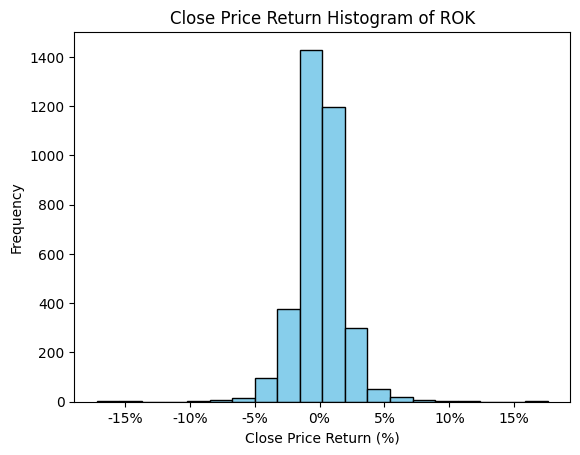

In [ ]:
# drawing close price histogram of a stock
# Converting the price value to percentage deviation value
i=0
returns = raw_price_for_my_tickers_v3[raw_price_for_my_tickers_v3.columns[6*i+3]].pct_change().dropna()
plt.hist(returns, bins=20, color='skyblue', edgecolor='black')
plt.title('Close Price Return Histogram of ROK')
plt.xlabel('Close Price Return (%)')
plt.ylabel('Frequency')
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()])
plt.show()

## **1-4 Creating Candle for ROK Open value**

In [ ]:
# loading the last version of dataset from google drive
drive.mount('/content/drive')
raw_price_for_my_tickers_v3 = pd.read_csv('/content/drive/MyDrive/raw_price_for_my_tickers_v3_main.csv', index_col=0, header=[0, 1])


Mounted at /content/drive


In [ ]:
raw_price_for_my_tickers_v3

ROK                                                  \
Date                   Open        High         Low       Close   Adj Close   
1/4/2010 0:00     47.610001   47.959999   47.009998   47.730000   35.636185   
1/5/2010 0:00     47.650002   47.820000   47.139999   47.349998   35.352463   
1/6/2010 0:00     47.349998   48.279999   47.230000   48.250000   36.024414   
1/7/2010 0:00     48.220001   48.869999   47.799999   48.779999   36.420143   
1/8/2010 0:00     48.630001   49.509998   48.349998   49.459999   36.927837   
...                     ...         ...         ...         ...         ...   
12/12/2023 0:00  280.709992  285.510010  279.480011  283.690002  283.690002   
12/13/2023 0:00  284.299988  291.269989  282.790008  290.970001  290.970001   
12/14/2023 0:00  295.000000  307.190002  292.769989  306.850006  306.850006   
12/15/2023 0:00  306.170013  309.790008  303.809998  304.369995  304.369995   
12/18/2023 0:00  304.739990  306.529999  301.820007  304.174988  304.174988   

                                  BA                                      ...  \
Date              Volume        Open        High         Low       Close  ...   
1/4/2010 0:00     904000   55.720001   56.389999   54.799999   56.180000  ...   
1/5/2010 0:00     964900   56.250000   58.279999   56.000000   58.020000  ...   
1/6/2010 0:00     893200   58.230000   59.990002   57.880001   59.779999  ...   
1/7/2010 0:00     673800   59.509998   62.310001   59.020000   62.200001  ...   
1/8/2010 0:00     664400   61.540001   61.779999   60.860001   61.599998  ...   
...                  ...         ...         ...         ...         ...  ...   
12/12/2023 0:00   838300  247.949997  250.570007  247.399994  248.630005  ...   
12/13/2023 0:00   979500  249.100006  251.869995  247.529999  250.910004  ...   
12/14/2023 0:00  1638400  250.910004  257.119995  249.259995  256.239990  ...   
12/15/2023 0:00  1710100  255.699997  265.519989  255.699997  264.269989  ...   
12/18/2023 0:00   216558  260.630005  263.130005  260.250000  262.004089  ...   

                      XRAY                                       HAS  \
Date                   Low      Close  Adj Close   Volume       Open   
1/4/2010 0:00    35.270000  35.330002  31.877628  1051400  32.529999   
1/5/2010 0:00    34.730000  34.910000  31.498653   763400  32.630001   
1/6/2010 0:00    34.750000  35.139999  31.706167  1595100  32.220001   
1/7/2010 0:00    34.880001  35.599998  32.121223  1096100  32.060001   
1/8/2010 0:00    35.450001  35.599998  32.121223   803600  32.090000   
...                    ...        ...        ...      ...        ...   
12/12/2023 0:00  31.320000  31.920000  31.920000  3145800  47.720001   
12/13/2023 0:00  31.639999  33.330002  33.330002  2429900  48.369999   
12/14/2023 0:00  33.700001  34.349998  34.349998  4605700  50.810001   
12/15/2023 0:00  33.939999  34.380001  34.380001  5155800  51.160000   
12/18/2023 0:00  33.705002  34.064999  34.064999   873603  50.250000   

                                                                      
Date                  High        Low      Close  Adj Close   Volume  
1/4/2010 0:00    32.750000  32.320000  32.540001  21.183405  1652600  
1/5/2010 0:00    32.630001  31.850000  32.180000  20.949039  1646900  
1/6/2010 0:00    32.220001  31.700001  32.150002  20.929502  1307500  
1/7/2010 0:00    32.259998  31.370001  31.690001  20.630054  3140300  
1/8/2010 0:00    32.340000  31.469999  31.770000  20.682133  2699600  
...                    ...        ...        ...        ...      ...  
12/12/2023 0:00  49.020000  47.090000  48.369999  48.369999  3715500  
12/13/2023 0:00  50.509998  47.830002  49.860001  49.860001  3298900  
12/14/2023 0:00  51.910000  50.340000  51.290001  51.290001  2461000  
12/15/2023 0:00  51.369999  49.860001  50.380001  50.380001  3288400  
12/18/2023 0:00  52.400002  49.759998  52.310001  52.310001  1129346  

[3514 rows x 1734 columns]

In [ ]:
ROK_data = raw_price_for_my_tickers_v3.iloc[:, 0:4]
ROK_data

ROK                                    
Date                   Open        High         Low       Close
1/4/2010 0:00     47.610001   47.959999   47.009998   47.730000
1/5/2010 0:00     47.650002   47.820000   47.139999   47.349998
1/6/2010 0:00     47.349998   48.279999   47.230000   48.250000
1/7/2010 0:00     48.220001   48.869999   47.799999   48.779999
1/8/2010 0:00     48.630001   49.509998   48.349998   49.459999
...                     ...         ...         ...         ...
12/12/2023 0:00  280.709992  285.510010  279.480011  283.690002
12/13/2023 0:00  284.299988  291.269989  282.790008  290.970001
12/14/2023 0:00  295.000000  307.190002  292.769989  306.850006
12/15/2023 0:00  306.170013  309.790008  303.809998  304.369995
12/18/2023 0:00  304.739990  306.529999  301.820007  304.174988

[3514 rows x 4 columns]

In [ ]:
ROK_data.index = pd.to_datetime(ROK_data.index, format='%m/%d/%Y %H:%M').strftime('%Y-%m-%d')
ROK_data.index = pd.to_datetime(ROK_data.index, format='%Y-%m-%d')
ROK_data

ROK                                    
Date              Open        High         Low       Close
2010-01-04   47.610001   47.959999   47.009998   47.730000
2010-01-05   47.650002   47.820000   47.139999   47.349998
2010-01-06   47.349998   48.279999   47.230000   48.250000
2010-01-07   48.220001   48.869999   47.799999   48.779999
2010-01-08   48.630001   49.509998   48.349998   49.459999
...                ...         ...         ...         ...
2023-12-12  280.709992  285.510010  279.480011  283.690002
2023-12-13  284.299988  291.269989  282.790008  290.970001
2023-12-14  295.000000  307.190002  292.769989  306.850006
2023-12-15  306.170013  309.790008  303.809998  304.369995
2023-12-18  304.739990  306.529999  301.820007  304.174988

[3514 rows x 4 columns]

In [ ]:
ROK_data.columns = ROK_data.columns.droplevel(0)
ROK_data

Date              Open        High         Low       Close
2010-01-04   47.610001   47.959999   47.009998   47.730000
2010-01-05   47.650002   47.820000   47.139999   47.349998
2010-01-06   47.349998   48.279999   47.230000   48.250000
2010-01-07   48.220001   48.869999   47.799999   48.779999
2010-01-08   48.630001   49.509998   48.349998   49.459999
...                ...         ...         ...         ...
2023-12-12  280.709992  285.510010  279.480011  283.690002
2023-12-13  284.299988  291.269989  282.790008  290.970001
2023-12-14  295.000000  307.190002  292.769989  306.850006
2023-12-15  306.170013  309.790008  303.809998  304.369995
2023-12-18  304.739990  306.529999  301.820007  304.174988

[3514 rows x 4 columns]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


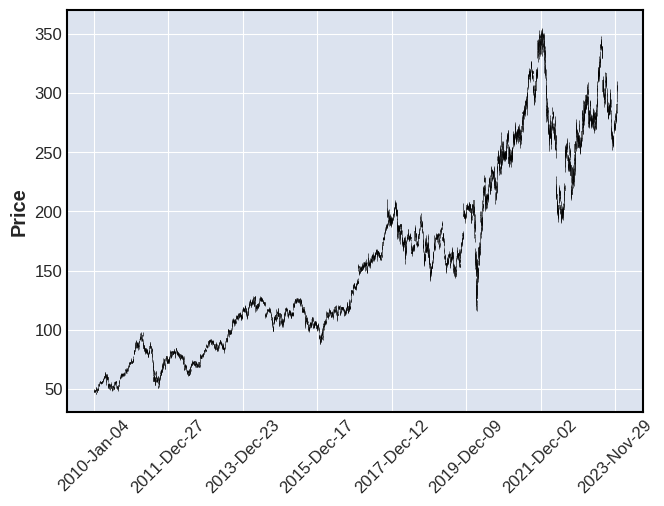

In [ ]:
print(type(ROK_data.index[0]))
mpf.plot(ROK_data, type='candle')

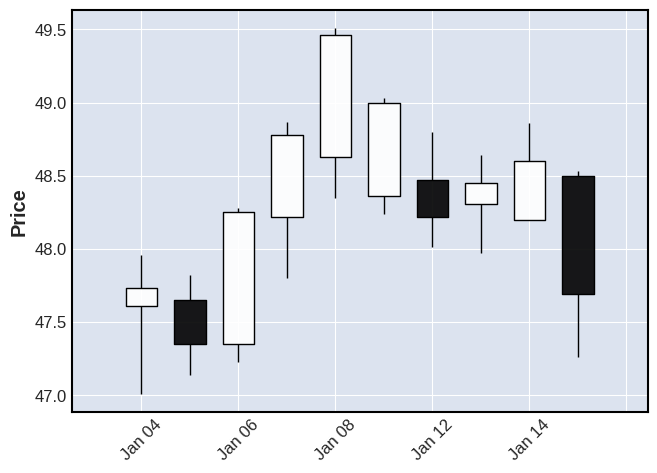

In [ ]:
# plot 10-days candle stick of ROK
ROK_data_10_days = raw_price_for_my_tickers_v3.iloc[0:10, 0:4]
ROK_data_10_days.index = pd.to_datetime(ROK_data_10_days.index, format='%m/%d/%Y %H:%M').strftime('%Y-%m-%d')
ROK_data_10_days.index = pd.to_datetime(ROK_data_10_days.index, format='%Y-%m-%d')
ROK_data_10_days.columns = ROK_data_10_days.columns.droplevel(0)
mpf.plot(ROK_data_10_days, type='candle')

# **2- Stock Price Prediction Using Neural Networks**

## **2.1 Data Processing for Model Training**

In [ ]:
# separate 5 main tickers
main_tickers_list = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']
main_tickers_data = yf.download(tickers=main_tickers_list, start="2018-01-04", interval="1d", group_by='ticker')


[*********************100%%**********************]  5 of 5 completed


In [ ]:
pd.set_option('display.max_columns', None)
main_tickers_data

GOOGL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-01-04   54.854500   55.203999   54.713001   54.787998   54.787998   
2018-01-05   55.172501   55.679001   55.090000   55.514500   55.514500   
2018-01-08   55.549999   55.958000   55.500000   55.710499   55.710499   
2018-01-09   55.922001   55.922001   55.410000   55.639500   55.639500   
2018-01-10   55.349998   55.639000   55.199001   55.507000   55.507000   
...                ...         ...         ...         ...         ...   
2023-12-15  131.619995  133.509995  131.179993  132.600006  132.600006   
2023-12-18  132.630005  137.149994  132.429993  135.800003  135.800003   
2023-12-19  136.839996  137.470001  136.080002  136.649994  136.649994   
2023-12-20  138.970001  141.699997  138.070007  138.339996  138.339996   
2023-12-21  139.490005  140.139893  139.179993  139.350006  139.350006   

                            AMZN                                      \
              Volume        Open        High         Low       Close   
Date                                                                   
2018-01-04  26052000   60.250000   60.793499   60.233002   60.479500   
2018-01-05  30250000   60.875500   61.457001   60.500000   61.457001   
2018-01-08  24644000   61.799999   62.653999   61.601501   62.343498   
2018-01-09  26808000   62.845001   62.966499   62.088001   62.634998   
2018-01-10  20734000   62.257500   62.716499   61.861500   62.716499   
...              ...         ...         ...         ...         ...   
2023-12-15  50815200  148.380005  150.570007  147.880005  149.970001   
2023-12-18  32258000  150.559998  154.850006  150.050003  154.070007   
2023-12-19  25476800  154.399994  155.119995  152.690002  153.789993   
2023-12-20  49040300  152.899994  155.630005  151.559998  152.119995   
2023-12-21   4833070  153.300003  153.500000  152.102402  152.899994   

                                         META                          \
             Adj Close     Volume        Open        High         Low   
Date                                                                    
2018-01-04   60.479500   60442000  184.899994  186.210007  184.100006   
2018-01-05   61.457001   70894000  185.589996  186.899994  184.929993   
2018-01-08   62.343498   85590000  187.199997  188.899994  186.330002   
2018-01-09   62.634998   73226000  188.699997  188.800003  187.100006   
2018-01-10   62.716499   53720000  186.940002  187.889999  185.630005   
...                ...        ...         ...         ...         ...   
2023-12-15  149.970001  110039100  331.989990  338.660004  331.220001   
2023-12-18  154.070007   62512800  337.480011  347.559998  337.019989   
2023-12-19  153.789993   43171300  345.579987  353.600006  345.119995   
2023-12-20  152.119995   50258500  348.649994  354.959991  347.790009   
2023-12-21  152.899994    8599932  352.980011  356.404999  351.446503   

                                                    MSFT              \
                 Close   Adj Close    Volume        Open        High   
Date                                                                   
2018-01-04  184.330002  184.330002  13880900   86.589996   87.660004   
2018-01-05  186.850006  186.850006  13574500   87.660004   88.410004   
2018-01-08  188.279999  188.279999  17994700   88.199997   88.580002   
2018-01-09  187.869995  187.869995  12393100   88.650002   88.730003   
2018-01-10  187.839996  187.839996  10529900   87.860001   88.190002   
...                ...         ...       ...         ...         ...   
2023-12-15  334.920013  334.920013  30001600  366.850006  372.399994   
2023-12-18  344.619995  344.619995  18993900  369.450012  373.000000   
2023-12-19  350.359985  350.359985  17729400  371.489990  373.260010   
2023-12-20  349.279999  349.279999  16334700  375.000000  376.029999   
2023-12-21  

In [ ]:
main_tickers_data.isnull().sum().sum()

0

In [ ]:
main_tickers_data.to_csv('main_tickers_data.csv', index=True)


In [ ]:
main_tickers_data.index = pd.to_datetime(main_tickers_data.index, format='%m/%d/%Y').strftime('%Y-%m-%d')
main_tickers_data.index = pd.to_datetime(main_tickers_data.index, format='%Y-%m-%d')

## **2.2 Loading Main Tickers Data from CSV**

In [ ]:
# loading imputed version of main tickers data from google drive
drive.mount('/content/drive')
main_tickers_data_imputed = pd.read_csv('/content/drive/MyDrive/main_tickers_data.csv', index_col=0, header=[0, 1])

Mounted at /content/drive


## **2.3 Google Stock Prediction**

### **2.3.1 Training on Normalized Data**

#### **2.3.1.1 Data Preprocessing**

In [ ]:
google_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[4]]
max_google = max(google_adj_close)
google_adj_close_normal = google_adj_close/np.max(google_adj_close)
google_adj_close_normal

1/4/2018      0.365647
1/5/2018      0.370496
1/8/2018      0.371804
1/9/2018      0.371330
1/10/2018     0.370446
                ...   
12/15/2023    0.884953
12/18/2023    0.906309
12/19/2023    0.911982
12/20/2023    0.923261
12/21/2023    0.930001
Name: (GOOGL, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    """
    Converts a time series dataframe into input (X) and output (y) arrays for the predicting models.

    Parameters:
    df (pd.DataFrame or pd.Series): The input time series data (e.g., adjusted close prices).
    window_size (int): The number of past time steps to use as input for predicting the next time step.

    Returns:
    X (np.ndarray): 3D array of shape (num_samples, window_size, 1), representing input sequences.
    y (np.ndarray): 1D array of shape (num_samples,), containing the corresponding labels (future values).
    """
    df_as_np = df.to_numpy()  # Convert dataframe to numpy array for efficient indexing
    X = []  # List to store input sequences
    y = []  # List to store output labels

    # Loop through the dataset to create input-output pairs
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]  # Create a window of past values as input
        X.append(row)  # Append the window to X
        label = df_as_np[i + window_size]  # The next value in the sequence is the target (y)
        y.append(label)

    return np.asarray(X), np.asarray(y)  # Convert lists to numpy arrays for model training

# Define the window size for past observations
window_size = 20

# Generate input (X) and output (y) sequences for Google's adjusted close prices
X_google, y_google = df_to_X_y(google_adj_close, window_size)

# Define the number of splits for time series cross-validation
cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

# Perform time series split (ensures training data precedes test data)
for train_index, test_index in tss.split(X_google):
    pass  # This loop executes but doesn't print anything; last train/test indices remain available

# Extract training and testing sets based on the last split indices
X_train_google, X_test_google = X_google[train_index], X_google[test_index]
y_train_google, y_test_google = y_google[train_index], y_google[test_index]


In [ ]:
# Set a fixed seed value for reproducibility across different runs
seed_value = 5

# Set the random seed for Python's built-in random module (affects functions like random.random())
random.seed(seed_value)

# Set the random seed for NumPy (ensures consistent results in numerical operations)
np.random.seed(seed_value)

# Set the random seed for TensorFlow (ensures reproducibility in deep learning models)
tf.random.set_seed(seed_value)

# Ensure reproducibility in Keras layers and operations (for model training)
keras.utils.set_random_seed(seed_value)

# Check the shape of the training dataset for Google's adjusted close price
X_train_google.shape

(1235, 20, 1)

#### **2.3.1.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                1760      
                                                                 
 dense_10 (Dense)            (None, 8)                 168       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 7s 116ms/step - loss: 0.1767 - root_mean_squared_error: 0.4203 - mae: 0.3934 - mape: 68.0158 - val_loss: 0.2531 - val_root_mean_squared_error: 0.5031 - val_mae: 0.4976 - val_mape: 63.0179
Epoch 2/20
39/39 [==============================] - 5s 122ms/step - loss: 0.1160 - root_mean_squared_error: 0.3405 - mae: 0.3144 - mape: 53.6718 - val_loss: 0.1581 - val_root_mean_squared_error: 0.3976 - val_mae: 0.3923 - val_mape: 49.5747
Epoch 3/20
39/39 [==============================] - 6s 163ms/step - loss: 0.0627 - root_mean_squared_error: 0.2504 - mae: 0.2249 - mape: 37.5496 - val_loss: 0.0776 - val_root_mean_squared_error: 0.2787 - val_mae: 0.2732 - val_mape: 34.3675
Epoch 4/20
39/39 [==============================] - 5s 128ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - mae: 0.1284 - mape: 20.1707 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604 - val_mae: 0.1538 - val_mape: 19.0987
Epoch 5/20
39/39 [======================

In [ ]:
model_LSTM = load_model('model_LSTM/')

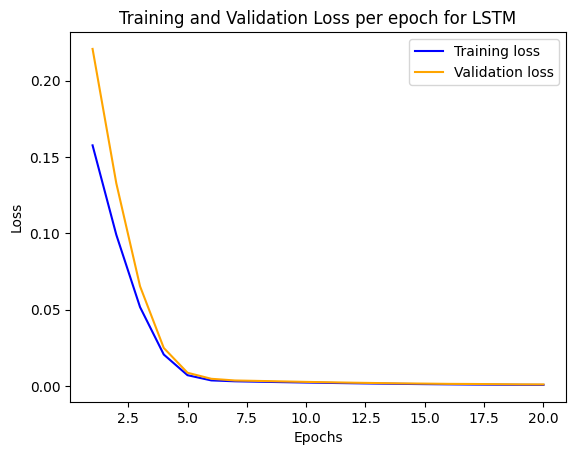

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 8s 138ms/step - loss: 0.3953 - root_mean_squared_error: 0.6287 - mae: 0.5873 - mape: 101.5939 - val_loss: 0.4987 - val_root_mean_squared_error: 0.7062 - val_mae: 0.6988 - val_mape: 88.5371
Epoch 2/20
39/39 [==============================] - 4s 103ms/step - loss: 0.2228 - root_mean_squared_error: 0.4721 - mae: 0.4352 - mape: 74.1832 - val_loss: 0.3019 - val_root_mean_squared_error: 0.5494 - val_mae: 0.5425 - val_mape: 68.5938
Epoch 3/20
39/39 [==============================] - 6s 148ms/step - loss: 0.1213 - root_mean_squared_error: 0.3483 - mae: 0.3111 - mape: 51.6064 - val_loss: 0.1556 - val_root_mean_squared_error: 0.3945 - val_mae: 0.3876 - val_mape: 48.8003
Epoch 4/20
39/39 [==============================] - 6s 154ms/step - loss: 0.0485 - root_mean_squared_error: 0.2203 - mae: 0.1785 - mape: 27.4425 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2278 - val_mae: 0.2202 - val_mape: 27.4246
Epoch 5/20
39/39 [=====================

In [ ]:
model_GRU = load_model('model_GRU/')

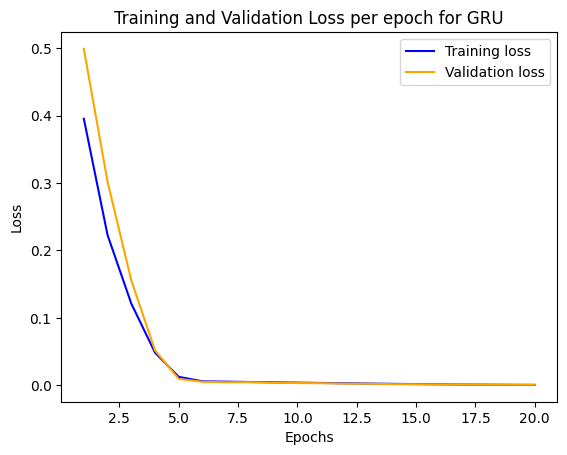

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.4 BiLSTM Model Training**

In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 49s 1s/step - loss: 0.0819 - root_mean_squared_error: 0.2862 - mae: 0.2353 - mape: 39.9774 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838 - val_mae: 0.0749 - val_mape: 9.1368
Epoch 2/20
39/39 [==============================] - 33s 858ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - mae: 0.0386 - mape: 7.5730 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mae: 0.0445 - val_mape: 5.4946
Epoch 3/20
39/39 [==============================] - 24s 634ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - mae: 0.0310 - mape: 5.8817 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0427 - val_mae: 0.0357 - val_mape: 4.4868
Epoch 4/20
39/39 [==============================] - 26s 690ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - mae: 0.0261 - mape: 4.8399 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mae: 0.0325 - val_mape: 4.1264
Epoch 5/20
39/39 [============================

In [ ]:
model_BiLSTM = load_model('model_GRU/')

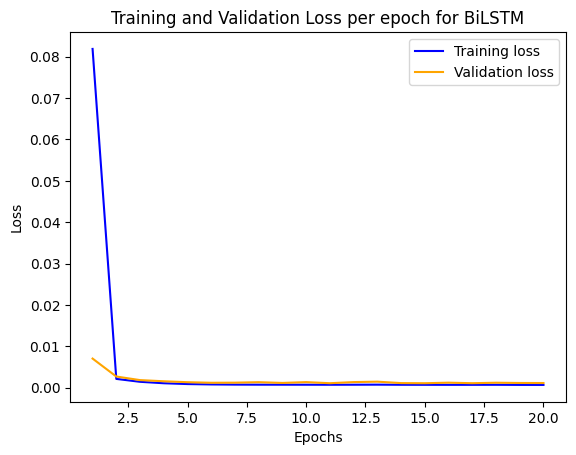

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 20)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                336       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 2s 25ms/step - loss: 0.5252 - root_mean_squared_error: 0.7247 - mae: 0.6803 - mape: 118.1133 - val_loss: 0.7250 - val_root_mean_squared_error: 0.8515 - val_mae: 0.8430 - val_mape: 106.8750
Epoch 2/20
39/39 [==============================] - 1s 19ms/step - loss: 0.3534 - root_mean_squared_error: 0.5945 - mae: 0.5557 - mape: 95.9735 - val_loss: 0.4966 - val_root_mean_squared_error: 0.7047 - val_mae: 0.6971 - val_mape: 88.3173
Epoch 3/20
39/39 [==============================] - 1s 19ms/step - loss: 0.2306 - root_mean_squared_error: 0.4802 - mae: 0.4459 - mape: 76.5613 - val_loss: 0.3233 - val_root_mean_squared_error: 0.5686 - val_mae: 0.5617 - val_mape: 71.0886
Epoch 4/20
39/39 [==============================] - 1s 19ms/step - loss: 0.1425 - root_mean_squared_error: 0.3775 - mae: 0.3474 - mape: 59.1232 - val_loss: 0.2001 - val_root_mean_squared_error: 0.4474 - val_mae: 0.4409 - val_mape: 55.7163
Epoch 5/20
39/39 [========================

In [ ]:
model_MLP = load_model('model_MLP/')

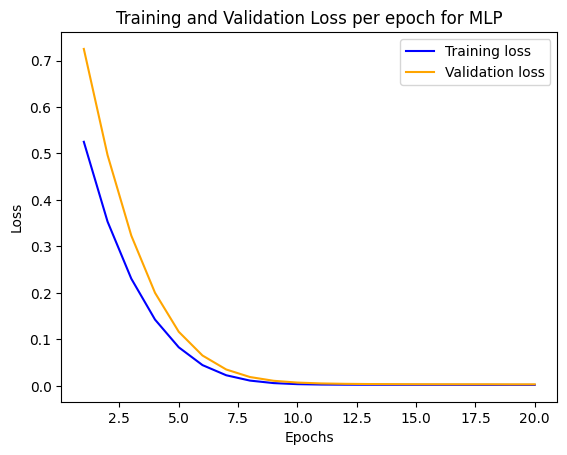

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_3 (ConvLSTM1D)  (None, 18, 32)            12800     
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_36 (Dense)            (None, 32)                18464     
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 319

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_google_conv = X_train_google.reshape(-1, 1, window_size, 1)
X_test_google_conv = X_test_google.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_google_conv, y_train_google, validation_data=(X_test_google_conv, y_test_google), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 7s 175ms/step - loss: 0.1055 - root_mean_squared_error: 0.3248 - mae: 0.2920 - mape: 48.6777 - val_loss: 0.1372 - val_root_mean_squared_error: 0.3704 - val_mae: 0.3642 - val_mape: 45.8841
Epoch 2/20
39/39 [==============================] - 4s 106ms/step - loss: 0.0433 - root_mean_squared_error: 0.2080 - mae: 0.1729 - mape: 27.1544 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200 - val_mae: 0.2133 - val_mape: 26.6550
Epoch 3/20
39/39 [==============================] - 4s 93ms/step - loss: 0.0119 - root_mean_squared_error: 0.1093 - mae: 0.0792 - mape: 11.4750 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1146 - val_mae: 0.1055 - val_mape: 12.9258
Epoch 4/20
39/39 [==============================] - 6s 145ms/step - loss: 0.0046 - root_mean_squared_error: 0.0678 - mae: 0.0566 - mape: 10.1954 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0742 - val_mae: 0.0653 - val_mape: 7.9509
Epoch 5/20
39/39 [========================

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM/')

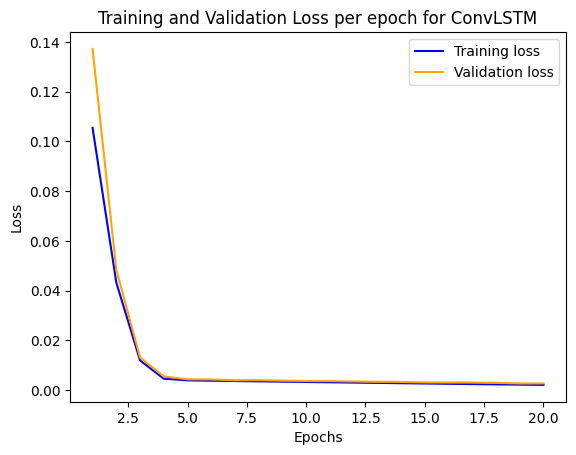

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 18, 64)         256       
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_40 (Dense)            (None, 64)                73792     
                                                                 
 dense_41 (Dense)            (None, 8)                 520       
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_google_conv = X_train_google.reshape(-1, 1, window_size, 1)
X_test_google_conv = X_test_google.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_google_conv, y_train_google, validation_data=(X_test_google_conv, y_test_google), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 2s 33ms/step - loss: 0.0562 - root_mean_squared_error: 0.2372 - mae: 0.1591 - mape: 27.9515 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628 - val_mae: 0.0540 - val_mape: 6.9998
Epoch 2/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - mae: 0.0266 - mape: 4.7211 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mae: 0.0313 - val_mape: 4.0268
Epoch 3/20
39/39 [==============================] - 1s 34ms/step - loss: 7.6748e-04 - root_mean_squared_error: 0.0277 - mae: 0.0207 - mape: 3.6336 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mae: 0.0310 - val_mape: 3.9921
Epoch 4/20
39/39 [==============================] - 1s 39ms/step - loss: 7.5695e-04 - root_mean_squared_error: 0.0275 - mae: 0.0206 - mape: 3.5964 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mae: 0.0295 - val_mape: 3.8187
Epoch 5/20
39/39 [=========================

In [ ]:
model_Conv = load_model('model_Conv/')

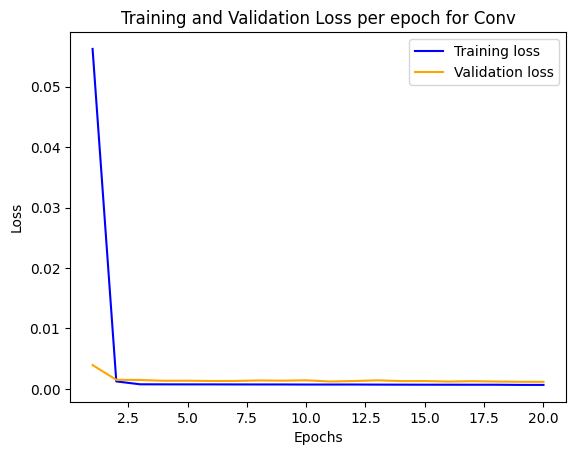

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.1.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_google = np.asarray(google_adj_close_normal[len(google_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_google_conv = X_pred_google.reshape(1,1,window_size,1)

print(X_pred_google)
print(X_pred_google_conv)

[[[0.91224886]
  [0.91038019]
  [0.91565249]
  [0.90090334]
  [0.88448562]
  [0.88001415]
  [0.86272889]
  [0.87420793]
  [0.86773428]
  [0.91385052]
  [0.90090334]
  [0.88955771]
  [0.88441891]
  [0.88475263]
  [0.88054807]
  [0.88495283]
  [0.90630914]
  [0.91198185]
  [0.92326068]
  [0.93000134]]]
[[[[0.91224886]
   [0.91038019]
   [0.91565249]
   [0.90090334]
   [0.88448562]
   [0.88001415]
   [0.86272889]
   [0.87420793]
   [0.86773428]
   [0.91385052]
   [0.90090334]
   [0.88955771]
   [0.88441891]
   [0.88475263]
   [0.88054807]
   [0.88495283]
   [0.90630914]
   [0.91198185]
   [0.92326068]
   [0.93000134]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_google)
pred_LSTM = model_LSTM.predict(X_pred_google)
pred_BiLSTM = model_BiLSTM.predict(X_pred_google)
pred_MLP = model_MLP.predict(X_pred_google)

pred_Conv = model_Conv.predict(X_pred_google_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_google_conv)


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 346ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')




 GRU model prediction: [[0.8895281]]
 LSTM model prediction: [[0.8833814]]
 BiLSTM model prediction: [[0.8895281]]
 MLP model prediction: [[0.85578287]]
 Conv model prediction: [[0.8938705]]
 ConvLSTM model prediction: [[0.8496596]]



### **2.3.2 Training on Non-Normalized Data**

#### **2.3.2.1 Data Preprocessing**

In [ ]:
google_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[4]]
google_adj_close

1/4/2018       54.787998
1/5/2018       55.514500
1/8/2018       55.710499
1/9/2018       55.639500
1/10/2018      55.507000
                 ...    
12/15/2023    132.600006
12/18/2023    135.800003
12/19/2023    136.649994
12/20/2023    138.339996
12/21/2023    139.350006
Name: (GOOGL, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    """
    Converts a time series dataframe into input (X) and output (y) arrays for the predicting models.

    Parameters:
    df (pd.DataFrame or pd.Series): The input time series data (e.g., adjusted close prices).
    window_size (int): The number of past time steps to use as input for predicting the next time step.

    Returns:
    X (np.ndarray): 3D array of shape (num_samples, window_size, 1), representing input sequences.
    y (np.ndarray): 1D array of shape (num_samples,), containing the corresponding labels (future values).
    """
    df_as_np = df.to_numpy()  # Convert dataframe to numpy array for efficient indexing
    X = []  # List to store input sequences
    y = []  # List to store output labels

    # Loop through the dataset to create input-output pairs
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]  # Create a window of past values as input
        X.append(row)  # Append the window to X
        label = df_as_np[i + window_size]  # The next value in the sequence is the target (y)
        y.append(label)

    return np.asarray(X), np.asarray(y)  # Convert lists to numpy arrays for model training

# Define the window size for past observations
window_size = 20

# Generate input (X) and output (y) sequences for Google's adjusted close prices
X_google, y_google = df_to_X_y(google_adj_close, window_size)

# Define the number of splits for time series cross-validation
cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

# Perform time series split (ensures training data precedes test data)
for train_index, test_index in tss.split(X_google):
    pass  # This loop executes but doesn't print anything; last train/test indices remain available

# Extract training and testing sets based on the last split indices
X_train_google, X_test_google = X_google[train_index], X_google[test_index]
y_train_google, y_test_google = y_google[train_index], y_google[test_index]


In [ ]:
seed_value = 5
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

X_train_google.shape

(1235, 20, 1)

#### **2.3.2.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20)                1760      
                                                                 
 dense_45 (Dense)            (None, 8)                 168       
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM_notnomalize/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 7s 112ms/step - loss: 8209.2881 - root_mean_squared_error: 90.6051 - mae: 85.2194 - mape: 98.7027 - val_loss: 13958.7451 - val_root_mean_squared_error: 118.1471 - val_mae: 117.0387 - val_mape: 99.0819
Epoch 2/20
39/39 [==============================] - 5s 139ms/step - loss: 8188.8228 - root_mean_squared_error: 90.4921 - mae: 85.0992 - mape: 98.5457 - val_loss: 13921.4697 - val_root_mean_squared_error: 117.9893 - val_mae: 116.8796 - val_mape: 98.9446
Epoch 3/20
39/39 [==============================] - 6s 144ms/step - loss: 8160.2163 - root_mean_squared_error: 90.3339 - mae: 84.9311 - mape: 98.3264 - val_loss: 13888.9248 - val_root_mean_squared_error: 117.8513 - val_mae: 116.7408 - val_mape: 98.8251
Epoch 4/20
39/39 [==============================] - 4s 102ms/step - loss: 8140.9077 - root_mean_squared_error: 90.2270 - mae: 84.8181 - mape: 98.1795 - val_loss: 13865.7188 - val_root_mean_squared_error: 117.7528 - val_mae: 116.6416 - val_ma

In [ ]:
model_LSTM = load_model('model_LSTM_notnomalize/')

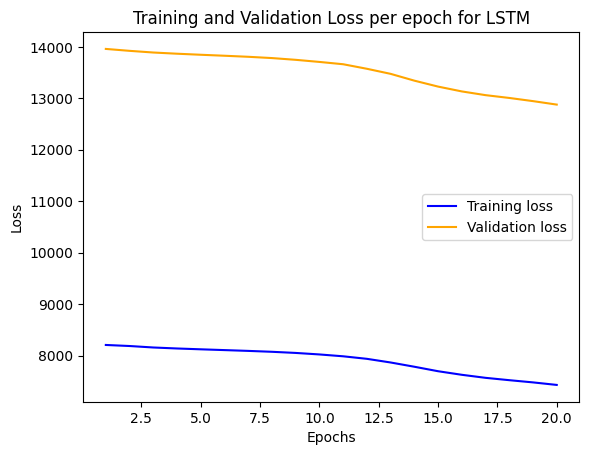

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                12864     
                                                                 
 dense_47 (Dense)            (None, 8)                 520       
                                                                 
 dense_48 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU_notnormalize/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 7s 117ms/step - loss: 8290.5928 - root_mean_squared_error: 91.0527 - mae: 85.7480 - mape: 99.4514 - val_loss: 13975.2549 - val_root_mean_squared_error: 118.2170 - val_mae: 117.1203 - val_mape: 99.1627
Epoch 2/20
39/39 [==============================] - 4s 117ms/step - loss: 8193.5234 - root_mean_squared_error: 90.5181 - mae: 85.1816 - mape: 98.7158 - val_loss: 13884.6846 - val_root_mean_squared_error: 117.8333 - val_mae: 116.7295 - val_mape: 98.8218
Epoch 3/20
39/39 [==============================] - 6s 145ms/step - loss: 8141.3945 - root_mean_squared_error: 90.2297 - mae: 84.8604 - mape: 98.2807 - val_loss: 13828.6406 - val_root_mean_squared_error: 117.5952 - val_mae: 116.4862 - val_mape: 98.6087
Epoch 4/20
39/39 [==============================] - 6s 151ms/step - loss: 8089.1060 - root_mean_squared_error: 89.9395 - mae: 84.5275 - mape: 97.8180 - val_loss: 13762.3076 - val_root_mean_squared_error: 117.3129 - val_mae: 116.1974 - val_ma

In [ ]:
model_GRU = load_model('model_GRU_notnormalize/')

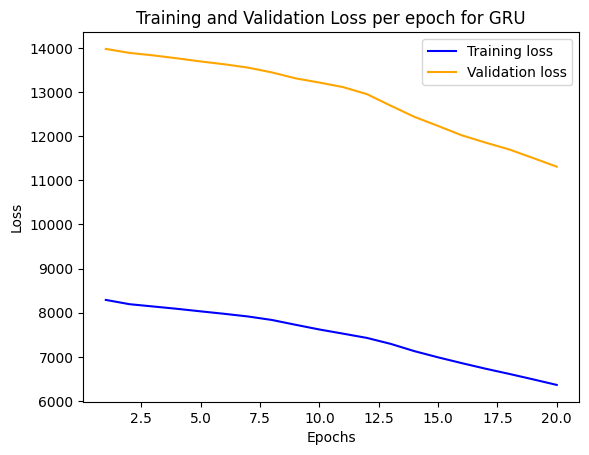

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.4 BiLSTM Model Training**





In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_49 (Dense)            (None, 8)                 520       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM_notnormalize/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 41s 855ms/step - loss: 8340.9844 - root_mean_squared_error: 91.3290 - mae: 85.9801 - mape: 99.6856 - val_loss: 14100.6445 - val_root_mean_squared_error: 118.7461 - val_mae: 117.6421 - val_mape: 99.6022
Epoch 2/20
39/39 [==============================] - 27s 702ms/step - loss: 8263.7871 - root_mean_squared_error: 90.9054 - mae: 85.5264 - mape: 99.0887 - val_loss: 13997.3418 - val_root_mean_squared_error: 118.3104 - val_mae: 117.2018 - val_mape: 99.2212
Epoch 3/20
39/39 [==============================] - 26s 677ms/step - loss: 8180.1538 - root_mean_squared_error: 90.4442 - mae: 85.0309 - mape: 98.4370 - val_loss: 13875.6025 - val_root_mean_squared_error: 117.7947 - val_mae: 116.6807 - val_mape: 98.7705
Epoch 4/20
39/39 [==============================] - 27s 710ms/step - loss: 8088.6714 - root_mean_squared_error: 89.9370 - mae: 84.4925 - mape: 97.7351 - val_loss: 13747.2324 - val_root_mean_squared_error: 117.2486 - val_mae: 116.1296 - va

In [ ]:
model_BiLSTM = load_model('model_GRU_notnormalize/')

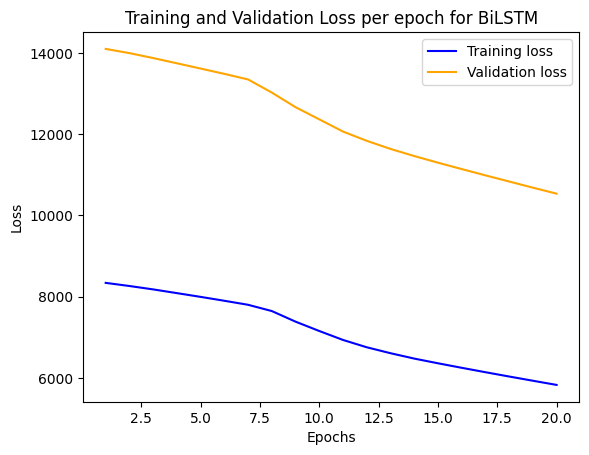

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 20)                0         
                                                                 
 dense_51 (Dense)            (None, 16)                336       
                                                                 
 dense_52 (Dense)            (None, 8)                 136       
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP_notnormalize/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_google, y_train_google, validation_data=(X_test_google, y_test_google), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 2s 25ms/step - loss: 7742.8267 - root_mean_squared_error: 87.9933 - mae: 82.8756 - mape: 96.1460 - val_loss: 12316.1514 - val_root_mean_squared_error: 110.9782 - val_mae: 109.9543 - val_mape: 93.1030
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 6808.1216 - root_mean_squared_error: 82.5113 - mae: 77.6858 - mape: 90.0942 - val_loss: 10759.4482 - val_root_mean_squared_error: 103.7278 - val_mae: 102.7653 - val_mape: 87.0103
Epoch 3/20
39/39 [==============================] - 1s 20ms/step - loss: 5923.6948 - root_mean_squared_error: 76.9655 - mae: 72.4574 - mape: 84.0302 - val_loss: 9354.9658 - val_root_mean_squared_error: 96.7211 - val_mae: 95.8182 - val_mape: 81.1242
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 5115.7896 - root_mean_squared_error: 71.5247 - mae: 67.3353 - mape: 78.0847 - val_loss: 7979.7759 - val_root_mean_squared_error: 89.3296 - val_mae: 88.4881 - val_mape: 74.913

In [ ]:
model_MLP = load_model('model_MLP_notnormalize/')

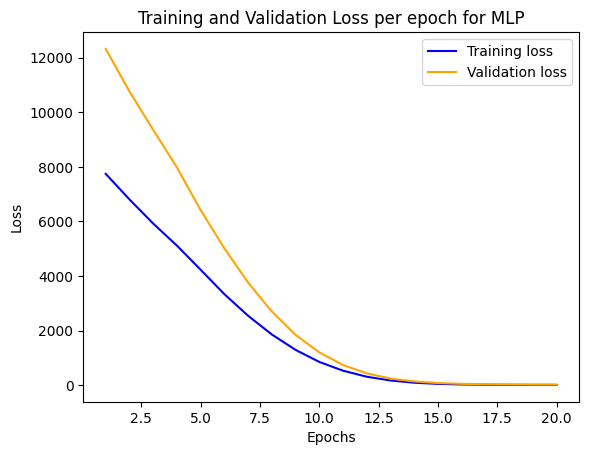

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_4 (ConvLSTM1D)  (None, 18, 32)            12800     
                                                                 
 flatten_8 (Flatten)         (None, 576)               0         
                                                                 
 dense_54 (Dense)            (None, 32)                18464     
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 dense_56 (Dense)            (None, 8)                 136       
                                                                 
 dense_57 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 319

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM_notnormalize/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_google_conv = X_train_google.reshape(-1, 1, window_size, 1)
X_test_google_conv = X_test_google.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_google_conv, y_train_google, validation_data=(X_test_google_conv, y_test_google), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 9s 159ms/step - loss: 8358.2734 - root_mean_squared_error: 91.4236 - mae: 86.0917 - mape: 99.8445 - val_loss: 14137.3359 - val_root_mean_squared_error: 118.9005 - val_mae: 117.7984 - val_mape: 99.7376
Epoch 2/20
39/39 [==============================] - 4s 114ms/step - loss: 8310.8750 - root_mean_squared_error: 91.1640 - mae: 85.8081 - mape: 99.4643 - val_loss: 14086.9355 - val_root_mean_squared_error: 118.6884 - val_mae: 117.5848 - val_mape: 99.5536
Epoch 3/20
39/39 [==============================] - 4s 93ms/step - loss: 8267.2158 - root_mean_squared_error: 90.9242 - mae: 85.5570 - mape: 99.1413 - val_loss: 14007.6621 - val_root_mean_squared_error: 118.3540 - val_mae: 117.2484 - val_mape: 99.2639
Epoch 4/20
39/39 [==============================] - 4s 93ms/step - loss: 8198.9033 - root_mean_squared_error: 90.5478 - mae: 85.1633 - mape: 98.6347 - val_loss: 13894.6719 - val_root_mean_squared_error: 117.8757 - val_mae: 116.7649 - val_mape

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM_notnormalize/')

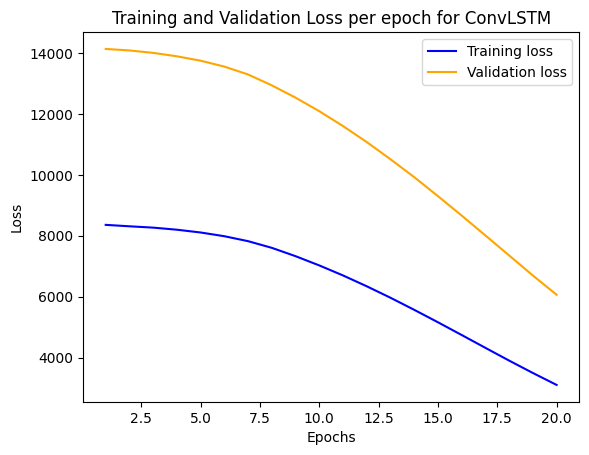

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 18, 64)         256       
                                                                 
 flatten_9 (Flatten)         (None, 1152)              0         
                                                                 
 dense_58 (Dense)            (None, 64)                73792     
                                                                 
 dense_59 (Dense)            (None, 8)                 520       
                                                                 
 dense_60 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv_notnormalize/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_google_conv = X_train_google.reshape(-1, 1, window_size, 1)
X_test_google_conv = X_test_google.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_google_conv, y_train_google, validation_data=(X_test_google_conv, y_test_google), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 3s 48ms/step - loss: 1982.0996 - root_mean_squared_error: 44.5208 - mae: 34.4356 - mape: 40.2960 - val_loss: 167.8176 - val_root_mean_squared_error: 12.9544 - val_mae: 11.4807 - val_mape: 9.8167
Epoch 2/20
39/39 [==============================] - 2s 39ms/step - loss: 44.2049 - root_mean_squared_error: 6.6487 - mae: 4.9788 - mape: 5.8185 - val_loss: 32.5982 - val_root_mean_squared_error: 5.7095 - val_mae: 4.5850 - val_mape: 4.0107
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 20.3557 - root_mean_squared_error: 4.5117 - mae: 3.3784 - mape: 3.9534 - val_loss: 35.4571 - val_root_mean_squared_error: 5.9546 - val_mae: 4.8020 - val_mape: 4.1570
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 19.8694 - root_mean_squared_error: 4.4575 - mae: 3.3464 - mape: 3.8966 - val_loss: 35.9781 - val_root_mean_squared_error: 5.9982 - val_mae: 4.8340 - val_mape: 4.1774
Epoch 5/20
39/39 [====================

In [ ]:
model_Conv = load_model('model_Conv_notnormalize/')

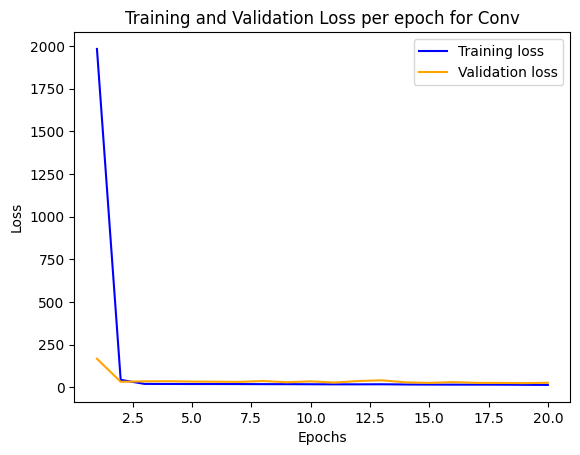

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.3.2.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_google = np.asarray(google_adj_close[len(google_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_google_conv = X_pred_google.reshape(1,1,window_size,1)

print(X_pred_google)
print(X_pred_google_conv)

[[[136.6900024]
  [136.4100037]
  [137.1999969]
  [134.9900055]
  [132.5299988]
  [131.8600006]
  [129.2700043]
  [130.9900055]
  [130.0200043]
  [136.9299927]
  [134.9900055]
  [133.2899933]
  [132.5200043]
  [132.5700073]
  [131.9400024]
  [132.6000061]
  [135.8000031]
  [136.6499939]
  [138.3399963]
  [139.3500061]]]
[[[[136.6900024]
   [136.4100037]
   [137.1999969]
   [134.9900055]
   [132.5299988]
   [131.8600006]
   [129.2700043]
   [130.9900055]
   [130.0200043]
   [136.9299927]
   [134.9900055]
   [133.2899933]
   [132.5200043]
   [132.5700073]
   [131.9400024]
   [132.6000061]
   [135.8000031]
   [136.6499939]
   [138.3399963]
   [139.3500061]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_google)
pred_LSTM = model_LSTM.predict(X_pred_google)
pred_BiLSTM = model_BiLSTM.predict(X_pred_google)
pred_MLP = model_MLP.predict(X_pred_google)

pred_Conv = model_Conv.predict(X_pred_google_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_google_conv)


1/1 [==============================] - 0s 337ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')




 GRU model prediction: [[12.898907]]
 LSTM model prediction: [[5.7373915]]
 BiLSTM model prediction: [[12.898907]]
 MLP model prediction: [[135.16574]]
 Conv model prediction: [[135.6359]]
 ConvLSTM model prediction: [[41.938313]]


## **2.4 Amazon Stock Prediction**

### **2.4.1 Training on Normalized Data**

#### **2.4.1.1 Data Preprocessing**

In [ ]:
amazon_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[10]]
max_amazon = max(amazon_adj_close)
amazon_adj_close_normal = amazon_adj_close/np.max(amazon_adj_close)
amazon_adj_close_normal

1/4/2018      0.324164
1/5/2018      0.329404
1/8/2018      0.334155
1/9/2018      0.335718
1/10/2018     0.336154
                ...   
12/15/2023    0.803825
12/18/2023    0.825800
12/19/2023    0.824300
12/20/2023    0.815349
12/21/2023    0.819529
Name: (AMZN, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.asarray(X), np.asarray(y)

window_size = 20
X_amazon, y_amazon = df_to_X_y(amazon_adj_close_normal , window_size)

cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits = cv_n_splits)

for train_index, test_index in tss.split(X_amazon):
    pass
    # print("Train:", train_index)
X_train_amazon, X_test_amazon = X_amazon[train_index], X_amazon[test_index]
y_train_amazon, y_test_amazon = y_amazon[train_index], y_amazon[test_index]

In [ ]:
seed_value = 5
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

X_train_amazon.shape

(1235, 20, 1)

#### **2.4.1.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 20)                1760      
                                                                 
 dense_61 (Dense)            (None, 8)                 168       
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_amazon, y_train_amazon, validation_data=(X_test_amazon, y_test_amazon), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 9s 150ms/step - loss: 0.4723 - root_mean_squared_error: 0.6872 - mae: 0.6598 - mape: 101.8883 - val_loss: 0.4139 - val_root_mean_squared_error: 0.6434 - val_mae: 0.6356 - val_mape: 98.4312
Epoch 2/20
39/39 [==============================] - 4s 106ms/step - loss: 0.4114 - root_mean_squared_error: 0.6414 - mae: 0.6147 - mape: 94.7226 - val_loss: 0.3544 - val_root_mean_squared_error: 0.5953 - val_mae: 0.5877 - val_mape: 90.9671
Epoch 3/20
39/39 [==============================] - 4s 113ms/step - loss: 0.3459 - root_mean_squared_error: 0.5882 - mae: 0.5622 - mape: 86.4073 - val_loss: 0.2888 - val_root_mean_squared_error: 0.5374 - val_mae: 0.5301 - val_mape: 81.9861
Epoch 4/20
39/39 [==============================] - 7s 185ms/step - loss: 0.2744 - root_mean_squared_error: 0.5238 - mae: 0.4987 - mape: 76.3535 - val_loss: 0.2189 - val_root_mean_squared_error: 0.4679 - val_mae: 0.4609 - val_mape: 71.1903
Epoch 5/20
39/39 [=====================

In [ ]:
model_LSTM = load_model('model_LSTM/')

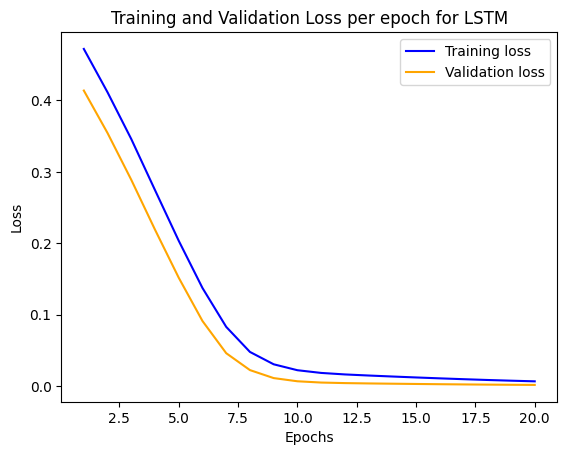

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                12864     
                                                                 
 dense_63 (Dense)            (None, 8)                 520       
                                                                 
 dense_64 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_amazon, y_train_amazon, validation_data=(X_test_amazon, y_test_amazon), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 7s 115ms/step - loss: 0.2966 - root_mean_squared_error: 0.5446 - mae: 0.5210 - mape: 80.2446 - val_loss: 0.2257 - val_root_mean_squared_error: 0.4751 - val_mae: 0.4685 - val_mape: 72.4223
Epoch 2/20
39/39 [==============================] - 4s 103ms/step - loss: 0.1930 - root_mean_squared_error: 0.4393 - mae: 0.4157 - mape: 63.3832 - val_loss: 0.1291 - val_root_mean_squared_error: 0.3593 - val_mae: 0.3528 - val_mape: 54.3135
Epoch 3/20
39/39 [==============================] - 5s 131ms/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - mae: 0.2797 - mape: 41.6720 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1997 - val_mae: 0.1926 - val_mape: 29.2711
Epoch 4/20
39/39 [==============================] - 4s 94ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - mae: 0.1052 - mape: 14.6609 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mae: 0.0284 - val_mape: 4.5176
Epoch 5/20
39/39 [========================

In [ ]:
model_GRU = load_model('model_GRU/')

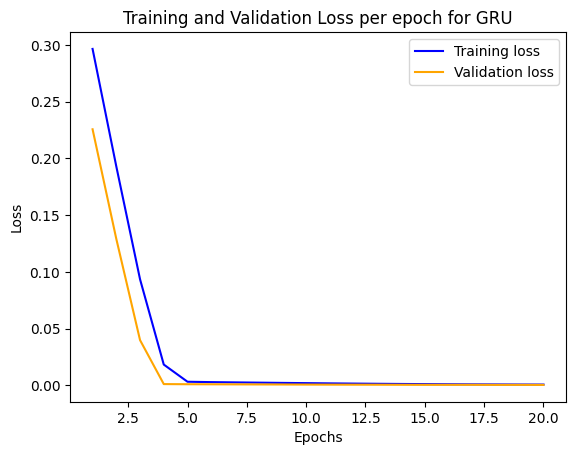

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.4 BiLSTM Model Training**

In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_65 (Dense)            (None, 8)                 520       
                                                                 
 dense_66 (Dense)            (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_amazon, y_train_amazon, validation_data=(X_test_amazon, y_test_amazon), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 39s 717ms/step - loss: 0.2727 - root_mean_squared_error: 0.5222 - mae: 0.4943 - mape: 76.1753 - val_loss: 0.1242 - val_root_mean_squared_error: 0.3524 - val_mae: 0.3468 - val_mape: 53.5233
Epoch 2/20
39/39 [==============================] - 27s 722ms/step - loss: 0.0468 - root_mean_squared_error: 0.2164 - mae: 0.1762 - mape: 26.2829 - val_loss: 9.7511e-04 - val_root_mean_squared_error: 0.0312 - val_mae: 0.0257 - val_mape: 4.0071
Epoch 3/20
39/39 [==============================] - 43s 1s/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - mae: 0.0406 - mape: 7.0158 - val_loss: 8.6129e-04 - val_root_mean_squared_error: 0.0293 - val_mae: 0.0241 - val_mape: 3.7883
Epoch 4/20
39/39 [==============================] - 33s 863ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - mae: 0.0362 - mape: 6.0291 - val_loss: 7.6785e-04 - val_root_mean_squared_error: 0.0277 - val_mae: 0.0226 - val_mape: 3.5958
Epoch 5/20
39/39 [==============

In [ ]:
model_BiLSTM = load_model('model_GRU/')

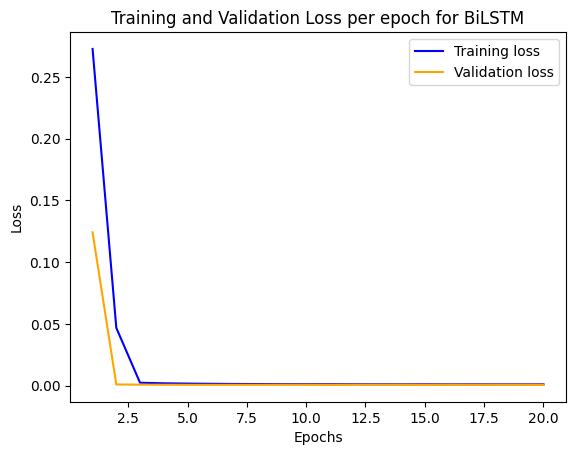

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 20)                0         
                                                                 
 dense_67 (Dense)            (None, 16)                336       
                                                                 
 dense_68 (Dense)            (None, 8)                 136       
                                                                 
 dense_69 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_amazon, y_train_amazon, validation_data=(X_test_amazon, y_test_amazon), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 3s 40ms/step - loss: 0.4816 - root_mean_squared_error: 0.6939 - mae: 0.6662 - mape: 102.8415 - val_loss: 0.4262 - val_root_mean_squared_error: 0.6528 - val_mae: 0.6449 - val_mape: 99.8958
Epoch 2/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4483 - root_mean_squared_error: 0.6696 - mae: 0.6425 - mape: 99.1183 - val_loss: 0.4168 - val_root_mean_squared_error: 0.6456 - val_mae: 0.6377 - val_mape: 98.7724
Epoch 3/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4427 - root_mean_squared_error: 0.6654 - mae: 0.6381 - mape: 98.4015 - val_loss: 0.4119 - val_root_mean_squared_error: 0.6418 - val_mae: 0.6339 - val_mape: 98.1637
Epoch 4/20
39/39 [==============================] - 3s 92ms/step - loss: 0.4378 - root_mean_squared_error: 0.6617 - mae: 0.6343 - mape: 97.7542 - val_loss: 0.4071 - val_root_mean_squared_error: 0.6380 - val_mae: 0.6301 - val_mape: 97.5555
Epoch 5/20
39/39 [=========================

In [ ]:
model_MLP = load_model('model_MLP/')

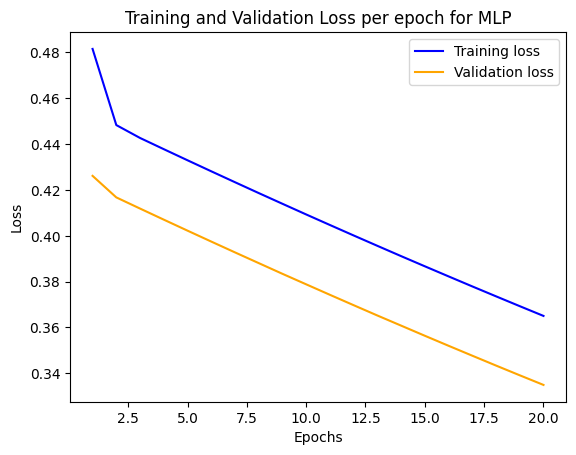

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_5 (ConvLSTM1D)  (None, 18, 32)            12800     
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_70 (Dense)            (None, 32)                18464     
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 dense_72 (Dense)            (None, 8)                 136       
                                                                 
 dense_73 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 319

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_amazon_conv = X_train_amazon.reshape(-1, 1, window_size, 1)
X_test_amazon_conv = X_test_amazon.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_amazon_conv, y_train_amazon, validation_data=(X_test_amazon_conv, y_test_amazon), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 7s 104ms/step - loss: 0.4134 - root_mean_squared_error: 0.6430 - mae: 0.6162 - mape: 94.9986 - val_loss: 0.3341 - val_root_mean_squared_error: 0.5780 - val_mae: 0.5705 - val_mape: 88.2646
Epoch 2/20
39/39 [==============================] - 4s 104ms/step - loss: 0.3002 - root_mean_squared_error: 0.5479 - mae: 0.5215 - mape: 79.9059 - val_loss: 0.2187 - val_root_mean_squared_error: 0.4676 - val_mae: 0.4603 - val_mape: 71.0322
Epoch 3/20
39/39 [==============================] - 5s 122ms/step - loss: 0.1715 - root_mean_squared_error: 0.4142 - mae: 0.3871 - mape: 58.5569 - val_loss: 0.0964 - val_root_mean_squared_error: 0.3104 - val_mae: 0.3033 - val_mape: 46.5318
Epoch 4/20
39/39 [==============================] - 6s 147ms/step - loss: 0.0577 - root_mean_squared_error: 0.2403 - mae: 0.2101 - mape: 30.5492 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308 - val_mae: 0.1219 - val_mape: 18.2203
Epoch 5/20
39/39 [======================

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM/')

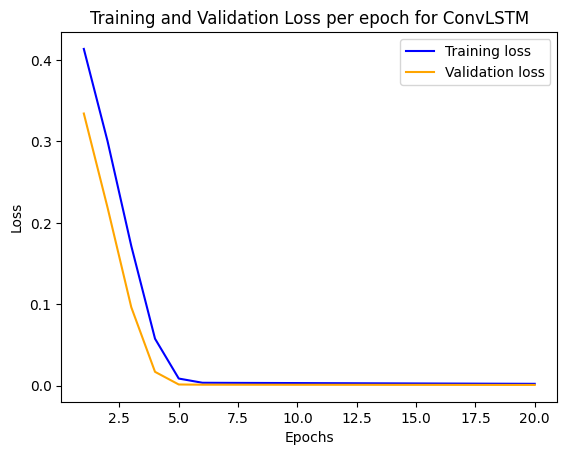

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 18, 64)         256       
                                                                 
 flatten_12 (Flatten)        (None, 1152)              0         
                                                                 
 dense_74 (Dense)            (None, 64)                73792     
                                                                 
 dense_75 (Dense)            (None, 8)                 520       
                                                                 
 dense_76 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_amazon_conv = X_train_amazon.reshape(-1, 1, window_size, 1)
X_test_amazon_conv = X_test_amazon.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_amazon_conv, y_train_amazon, validation_data=(X_test_amazon_conv, y_test_amazon), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 2s 33ms/step - loss: 0.2339 - root_mean_squared_error: 0.4836 - mae: 0.4512 - mape: 69.7617 - val_loss: 0.0744 - val_root_mean_squared_error: 0.2728 - val_mae: 0.2684 - val_mape: 41.4595
Epoch 2/20
39/39 [==============================] - 1s 35ms/step - loss: 0.0238 - root_mean_squared_error: 0.1543 - mae: 0.1254 - mape: 18.9790 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mae: 0.0336 - val_mape: 5.1356
Epoch 3/20
39/39 [==============================] - 1s 39ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - mae: 0.0302 - mape: 4.8297 - val_loss: 8.5944e-04 - val_root_mean_squared_error: 0.0293 - val_mae: 0.0239 - val_mape: 3.7782
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - mae: 0.0290 - mape: 4.5630 - val_loss: 9.4480e-04 - val_root_mean_squared_error: 0.0307 - val_mae: 0.0253 - val_mape: 3.9724
Epoch 5/20
39/39 [========================

In [ ]:
model_Conv = load_model('model_Conv/')

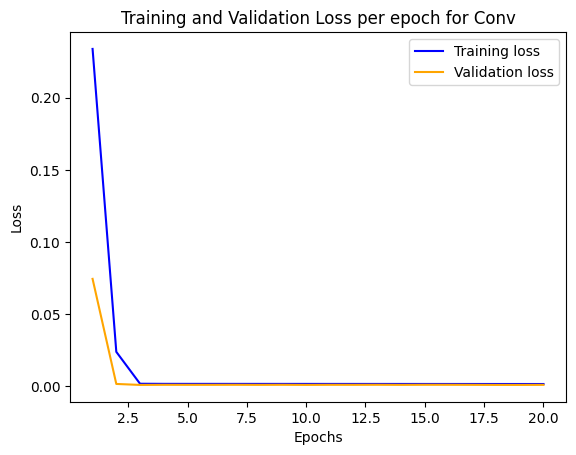

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.4.1.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_amazon = np.asarray(amazon_adj_close_normal[len(amazon_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_amazon_conv = X_pred_amazon.reshape(1,1,window_size,1)

print(X_pred_amazon)
print(X_pred_amazon_conv)

[[[0.78651239]
  [0.79181864]
  [0.78806672]
  [0.78426124]
  [0.7830284 ]
  [0.78806672]
  [0.77632852]
  [0.78726277]
  [0.77461339]
  [0.78726277]
  [0.79015708]
  [0.78195643]
  [0.79047866]
  [0.79776813]
  [0.79015708]
  [0.80382485]
  [0.82580049]
  [0.82429965]
  [0.81534861]
  [0.81952933]]]
[[[[0.78651239]
   [0.79181864]
   [0.78806672]
   [0.78426124]
   [0.7830284 ]
   [0.78806672]
   [0.77632852]
   [0.78726277]
   [0.77461339]
   [0.78726277]
   [0.79015708]
   [0.78195643]
   [0.79047866]
   [0.79776813]
   [0.79015708]
   [0.80382485]
   [0.82580049]
   [0.82429965]
   [0.81534861]
   [0.81952933]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_amazon)
pred_LSTM = model_LSTM.predict(X_pred_amazon)
pred_BiLSTM = model_BiLSTM.predict(X_pred_amazon)
pred_MLP = model_MLP.predict(X_pred_amazon)

pred_Conv = model_Conv.predict(X_pred_amazon_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_amazon_conv)


1/1 [==============================] - 1s 505ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')




 GRU model prediction: [[0.8062238]]
 LSTM model prediction: [[0.7462092]]
 BiLSTM model prediction: [[0.8062238]]
 MLP model prediction: [[0.07547526]]
 Conv model prediction: [[0.7915032]]
 ConvLSTM model prediction: [[0.7763477]]


## **2.5 Meta Stock Prediction**

### **2.5.1 Training on Normalized Data**

#### **2.5.1.1 Data Preprocessing**

In [ ]:
# loading imputed version of main tickers data from google drive
drive.mount('/content/drive')
main_tickers_data_imputed = pd.read_csv('/content/drive/MyDrive/main_tickers_data.csv', index_col=0, header=[0, 1])

Mounted at /content/drive


In [ ]:
meta_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[16]]
max_meta = max(meta_adj_close)
meta_adj_close_normal = meta_adj_close/np.max(meta_adj_close)
meta_adj_close_normal

1/4/2018      0.482312
1/5/2018      0.488906
1/8/2018      0.492647
1/9/2018      0.491575
1/10/2018     0.491496
                ...   
12/15/2023    0.876341
12/18/2023    0.901722
12/19/2023    0.916741
12/20/2023    0.913915
12/21/2023    0.919698
Name: (META, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.asarray(X), np.asarray(y)

window_size = 20
X_meta, y_meta = df_to_X_y(meta_adj_close_normal , window_size)

cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits = cv_n_splits)

for train_index, test_index in tss.split(X_meta):
    pass
    # print("Train:", train_index)
X_train_meta, X_test_meta = X_meta[train_index], X_meta[test_index]
y_train_meta, y_test_meta = y_meta[train_index], y_meta[test_index]

In [ ]:
seed_value = 5
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

X_train_meta.shape

(1235, 20, 1)

#### **2.5.1.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_meta, y_train_meta, validation_data=(X_test_meta, y_test_meta), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 9s 166ms/step - loss: 0.3718 - root_mean_squared_error: 0.6098 - mae: 0.5827 - mape: 101.8365 - val_loss: 0.4708 - val_root_mean_squared_error: 0.6861 - val_mae: 0.6661 - val_mape: 98.4371
Epoch 2/20
39/39 [==============================] - 4s 117ms/step - loss: 0.3224 - root_mean_squared_error: 0.5678 - mae: 0.5413 - mape: 94.3885 - val_loss: 0.4050 - val_root_mean_squared_error: 0.6364 - val_mae: 0.6172 - val_mape: 91.0818
Epoch 3/20
39/39 [==============================] - 5s 123ms/step - loss: 0.2695 - root_mean_squared_error: 0.5192 - mae: 0.4932 - mape: 85.7143 - val_loss: 0.3324 - val_root_mean_squared_error: 0.5766 - val_mae: 0.5584 - val_mape: 82.2413
Epoch 4/20
39/39 [==============================] - 5s 127ms/step - loss: 0.2115 - root_mean_squared_error: 0.4599 - mae: 0.4350 - mape: 75.2944 - val_loss: 0.2551 - val_root_mean_squared_error: 0.5051 - val_mae: 0.4880 - val_mape: 71.6723
Epoch 5/20
39/39 [=====================

In [ ]:
model_LSTM = load_model('model_LSTM/')

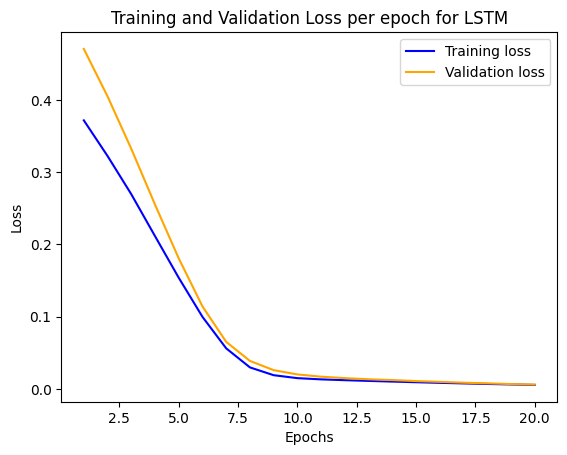

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_meta, y_train_meta, validation_data=(X_test_meta, y_test_meta), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 7s 115ms/step - loss: 0.2319 - root_mean_squared_error: 0.4815 - mae: 0.4580 - mape: 79.7732 - val_loss: 0.2601 - val_root_mean_squared_error: 0.5100 - val_mae: 0.4933 - val_mape: 72.5365
Epoch 2/20
39/39 [==============================] - 6s 147ms/step - loss: 0.1477 - root_mean_squared_error: 0.3843 - mae: 0.3604 - mape: 62.0432 - val_loss: 0.1530 - val_root_mean_squared_error: 0.3912 - val_mae: 0.3751 - val_mape: 54.5450
Epoch 3/20
39/39 [==============================] - 5s 119ms/step - loss: 0.0690 - root_mean_squared_error: 0.2626 - mae: 0.2355 - mape: 39.2775 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mae: 0.2133 - val_mape: 29.9983
Epoch 4/20
39/39 [==============================] - 4s 103ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148 - mae: 0.0866 - mape: 13.7408 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633 - val_mae: 0.0550 - val_mape: 8.1837
Epoch 5/20
39/39 [=======================

In [ ]:
model_GRU = load_model('model_GRU/')

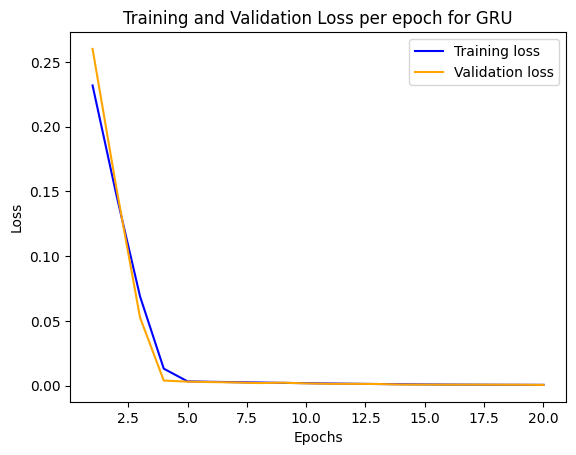

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.4 BiLSTM Model Training**

In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 20, 128)           33792     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_meta, y_train_meta, validation_data=(X_test_meta, y_test_meta), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 41s 795ms/step - loss: 0.2129 - root_mean_squared_error: 0.4614 - mae: 0.4336 - mape: 75.4799 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3825 - val_mae: 0.3700 - val_mape: 54.4432
Epoch 2/20
39/39 [==============================] - 28s 725ms/step - loss: 0.0353 - root_mean_squared_error: 0.1880 - mae: 0.1496 - mape: 25.1620 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mae: 0.0393 - val_mape: 5.5511
Epoch 3/20
39/39 [==============================] - 2s 45ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - mae: 0.0385 - mape: 7.6257 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0479 - val_mae: 0.0397 - val_mape: 5.5711
Epoch 4/20
39/39 [==============================] - 28s 729ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - mae: 0.0338 - mape: 6.4429 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mae: 0.0337 - val_mape: 4.8043
Epoch 5/20
39/39 [=========================

In [ ]:
model_BiLSTM = load_model('model_GRU/')

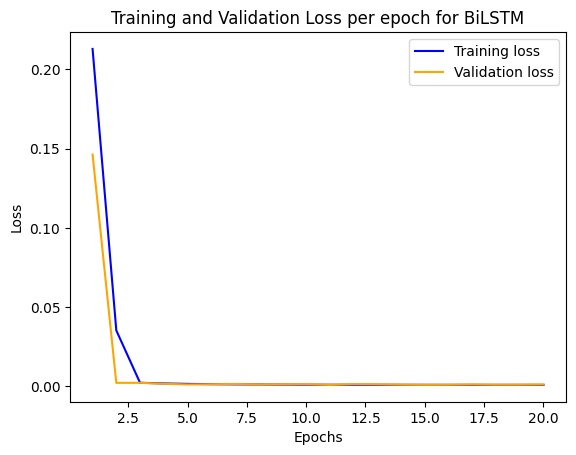

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                336       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_meta, y_train_meta, validation_data=(X_test_meta, y_test_meta), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 2s 26ms/step - loss: 0.3789 - root_mean_squared_error: 0.6156 - mae: 0.5882 - mape: 102.8058 - val_loss: 0.4849 - val_root_mean_squared_error: 0.6963 - val_mae: 0.6762 - val_mape: 99.9766
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - mae: 0.5668 - mape: 99.0014 - val_loss: 0.4741 - val_root_mean_squared_error: 0.6886 - val_mae: 0.6685 - val_mape: 98.8146
Epoch 3/20
39/39 [==============================] - 1s 22ms/step - loss: 0.3475 - root_mean_squared_error: 0.5895 - mae: 0.5626 - mape: 98.1892 - val_loss: 0.4690 - val_root_mean_squared_error: 0.6848 - val_mae: 0.6647 - val_mape: 98.1923
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 0.3432 - root_mean_squared_error: 0.5858 - mae: 0.5587 - mape: 97.4579 - val_loss: 0.4639 - val_root_mean_squared_error: 0.6811 - val_mae: 0.6608 - val_mape: 97.5757
Epoch 5/20
39/39 [=========================

In [ ]:
model_MLP = load_model('model_MLP/')

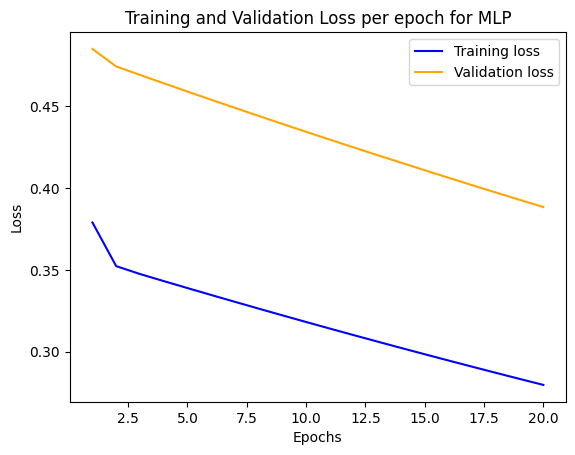

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d (ConvLSTM1D)    (None, 18, 32)            12800     
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 32)                18464     
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 3193

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_meta_conv = X_train_meta.reshape(-1, 1, window_size, 1)
X_test_meta_conv = X_test_meta.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_meta_conv, y_train_meta, validation_data=(X_test_meta_conv, y_test_meta), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 13s 201ms/step - loss: 0.3223 - root_mean_squared_error: 0.5678 - mae: 0.5411 - mape: 94.3926 - val_loss: 0.3796 - val_root_mean_squared_error: 0.6161 - val_mae: 0.5971 - val_mape: 88.0433
Epoch 2/20
39/39 [==============================] - 4s 96ms/step - loss: 0.2289 - root_mean_squared_error: 0.4784 - mae: 0.4519 - mape: 78.2274 - val_loss: 0.2515 - val_root_mean_squared_error: 0.5015 - val_mae: 0.4838 - val_mape: 70.9044
Epoch 3/20
39/39 [==============================] - 3s 92ms/step - loss: 0.1267 - root_mean_squared_error: 0.3560 - mae: 0.3282 - mape: 55.7692 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3403 - val_mae: 0.3246 - val_mape: 46.9195
Epoch 4/20
39/39 [==============================] - 5s 122ms/step - loss: 0.0405 - root_mean_squared_error: 0.2014 - mae: 0.1710 - mape: 27.7743 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1616 - val_mae: 0.1467 - val_mape: 20.2696
Epoch 5/20
39/39 [=======================

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM/')

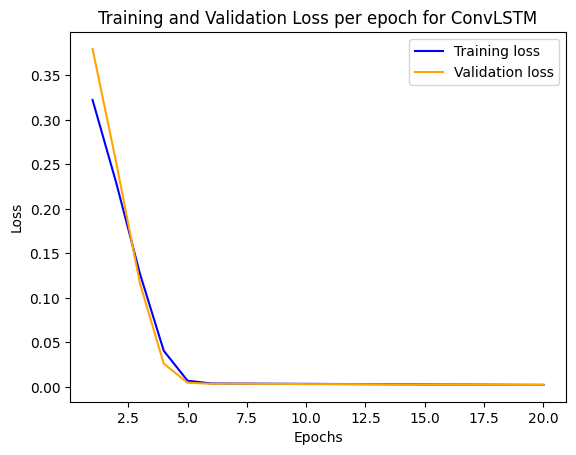

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 18, 64)         256       
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                73792     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_meta_conv = X_train_meta.reshape(-1, 1, window_size, 1)
X_test_meta_conv = X_test_meta.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_meta_conv, y_train_meta, validation_data=(X_test_meta_conv, y_test_meta), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 3s 38ms/step - loss: 0.1819 - root_mean_squared_error: 0.4265 - mae: 0.3947 - mape: 68.8878 - val_loss: 0.0860 - val_root_mean_squared_error: 0.2932 - val_mae: 0.2849 - val_mape: 42.2422
Epoch 2/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0181 - root_mean_squared_error: 0.1346 - mae: 0.1078 - mape: 18.3698 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mae: 0.0437 - val_mape: 6.5170
Epoch 3/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - mae: 0.0290 - mape: 5.4775 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mae: 0.0346 - val_mape: 5.1729
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - mae: 0.0290 - mape: 5.4462 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mae: 0.0348 - val_mape: 5.2034
Epoch 5/20
39/39 [==============================] 

In [ ]:
model_Conv = load_model('model_Conv/')

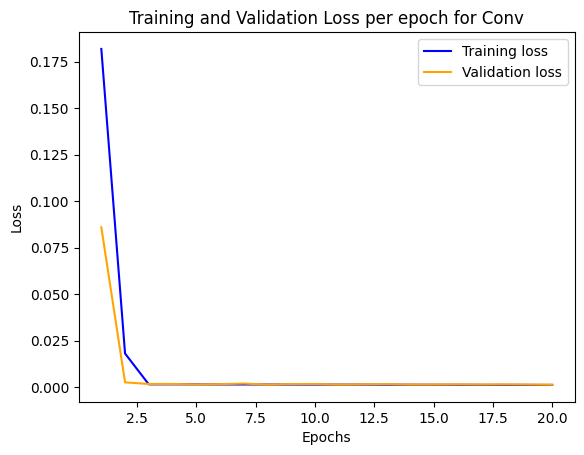

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.5.1.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_meta = np.asarray(meta_adj_close_normal[len(meta_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_meta_conv = X_pred_meta.reshape(1,1,window_size,1)

print(X_pred_meta)
print(X_pred_meta_conv)

[[[0.88500188]
  [0.87576539]
  [0.88699041]
  [0.86922397]
  [0.85601026]
  [0.84991369]
  [0.83735411]
  [0.8328275 ]
  [0.83062959]
  [0.85454499]
  [0.87066305]
  [0.85111729]
  [0.87450941]
  [0.87587   ]
  [0.87176205]
  [0.87634104]
  [0.90172171]
  [0.91674078]
  [0.91391492]
  [0.91969752]]]
[[[[0.88500188]
   [0.87576539]
   [0.88699041]
   [0.86922397]
   [0.85601026]
   [0.84991369]
   [0.83735411]
   [0.8328275 ]
   [0.83062959]
   [0.85454499]
   [0.87066305]
   [0.85111729]
   [0.87450941]
   [0.87587   ]
   [0.87176205]
   [0.87634104]
   [0.90172171]
   [0.91674078]
   [0.91391492]
   [0.91969752]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_meta)
pred_LSTM = model_LSTM.predict(X_pred_meta)
pred_BiLSTM = model_BiLSTM.predict(X_pred_meta)
pred_MLP = model_MLP.predict(X_pred_meta)

pred_Conv = model_Conv.predict(X_pred_meta_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_meta_conv)


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 482ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')
print(f' max of meta: {max_meta}')


 GRU model prediction: [[0.89395314]]
 LSTM model prediction: [[0.7435341]]
 BiLSTM model prediction: [[0.89395314]]
 MLP model prediction: [[0.07518773]]
 Conv model prediction: [[0.86375386]]
 ConvLSTM model prediction: [[0.82663596]]
 max of meta: 382.1799927


## **2.6 Microsoft Stock Prediction**

### **2.6.1 Training on Normalized Data**

#### **2.6.1.1 Data Preprocessing**

In [ ]:
microsoft_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[22]]
max_microsoft = max(microsoft_adj_close)
microsoft_adj_close_normal = microsoft_adj_close/np.max(microsoft_adj_close)
microsoft_adj_close_normal

1/4/2018      0.212469
1/5/2018      0.215103
1/8/2018      0.215323
1/9/2018      0.215176
1/10/2018     0.214200
                ...   
12/15/2023    0.968722
12/18/2023    0.973739
12/19/2023    0.975333
12/20/2023    0.968435
12/21/2023    0.970127
Name: (MSFT, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.asarray(X), np.asarray(y)

window_size = 20
X_microsoft, y_microsoft = df_to_X_y(microsoft_adj_close_normal , window_size)

cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits = cv_n_splits)

for train_index, test_index in tss.split(X_microsoft):
    pass
    # print("Train:", train_index)
X_train_microsoft, X_test_microsoft = X_microsoft[train_index], X_microsoft[test_index]
y_train_microsoft, y_test_microsoft = y_microsoft[train_index], y_microsoft[test_index]

In [ ]:
seed_value = 5
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

X_train_microsoft.shape

(1235, 20, 1)

#### **2.6.1.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                1760      
                                                                 
 dense_16 (Dense)            (None, 8)                 168       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_microsoft, y_train_microsoft, validation_data=(X_test_microsoft, y_test_microsoft), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 9s 158ms/step - loss: 0.2954 - root_mean_squared_error: 0.5435 - mae: 0.5059 - mape: 101.6754 - val_loss: 0.6545 - val_root_mean_squared_error: 0.8090 - val_mae: 0.8019 - val_mape: 98.6984
Epoch 2/20
39/39 [==============================] - 4s 113ms/step - loss: 0.2553 - root_mean_squared_error: 0.5052 - mae: 0.4685 - mape: 93.6463 - val_loss: 0.5656 - val_root_mean_squared_error: 0.7521 - val_mae: 0.7451 - val_mape: 91.6768
Epoch 3/20
39/39 [==============================] - 5s 130ms/step - loss: 0.2123 - root_mean_squared_error: 0.4608 - mae: 0.4254 - mape: 84.5605 - val_loss: 0.4678 - val_root_mean_squared_error: 0.6840 - val_mae: 0.6772 - val_mape: 83.2688
Epoch 4/20
39/39 [==============================] - 7s 177ms/step - loss: 0.1656 - root_mean_squared_error: 0.4069 - mae: 0.3733 - mape: 73.5800 - val_loss: 0.3633 - val_root_mean_squared_error: 0.6027 - val_mae: 0.5961 - val_mape: 73.2023
Epoch 5/20
39/39 [=====================

In [ ]:
model_LSTM = load_model('model_LSTM/')

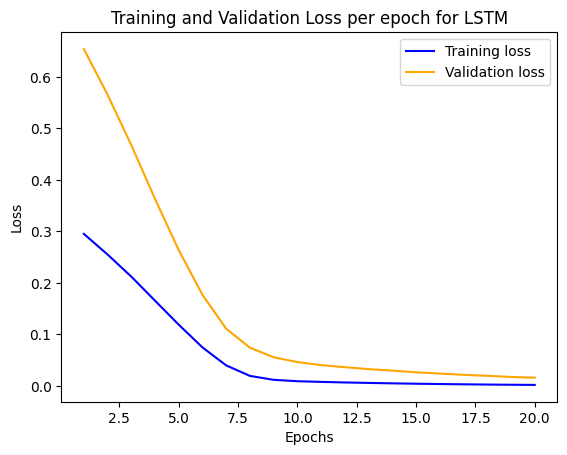

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_microsoft, y_train_microsoft, validation_data=(X_test_microsoft, y_test_microsoft), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 10s 161ms/step - loss: 0.1832 - root_mean_squared_error: 0.4280 - mae: 0.3960 - mape: 79.0687 - val_loss: 0.3669 - val_root_mean_squared_error: 0.6057 - val_mae: 0.5998 - val_mape: 73.7395
Epoch 2/20
39/39 [==============================] - 5s 126ms/step - loss: 0.1145 - root_mean_squared_error: 0.3384 - mae: 0.3055 - mape: 59.1840 - val_loss: 0.2220 - val_root_mean_squared_error: 0.4712 - val_mae: 0.4654 - val_mape: 57.0969
Epoch 3/20
39/39 [==============================] - 5s 121ms/step - loss: 0.0519 - root_mean_squared_error: 0.2277 - mae: 0.1918 - mape: 34.5979 - val_loss: 0.0840 - val_root_mean_squared_error: 0.2899 - val_mae: 0.2843 - val_mape: 34.6677
Epoch 4/20
39/39 [==============================] - 4s 103ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - mae: 0.0831 - mape: 16.3543 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010 - val_mae: 0.0938 - val_mape: 11.1330
Epoch 5/20
39/39 [=====================

In [ ]:
model_GRU = load_model('model_GRU/')

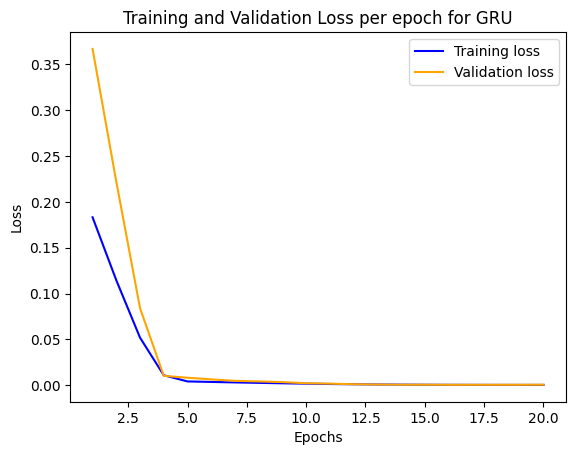

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.4 BiLSTM Model Training**

In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_microsoft, y_train_microsoft, validation_data=(X_test_microsoft, y_test_microsoft), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 41s 819ms/step - loss: 0.1685 - root_mean_squared_error: 0.4105 - mae: 0.3757 - mape: 75.0918 - val_loss: 0.2068 - val_root_mean_squared_error: 0.4547 - val_mae: 0.4494 - val_mape: 55.1725
Epoch 2/20
39/39 [==============================] - 30s 776ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - mae: 0.1262 - mape: 23.7229 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702 - val_mae: 0.0620 - val_mape: 7.3133
Epoch 3/20
39/39 [==============================] - 28s 747ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - mae: 0.0335 - mape: 9.0247 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mae: 0.0577 - val_mape: 6.8220
Epoch 4/20
39/39 [==============================] - 29s 757ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - mae: 0.0284 - mape: 7.1664 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mae: 0.0487 - val_mape: 5.7857
Epoch 5/20
39/39 [=======================

In [ ]:
model_BiLSTM = load_model('model_GRU/')

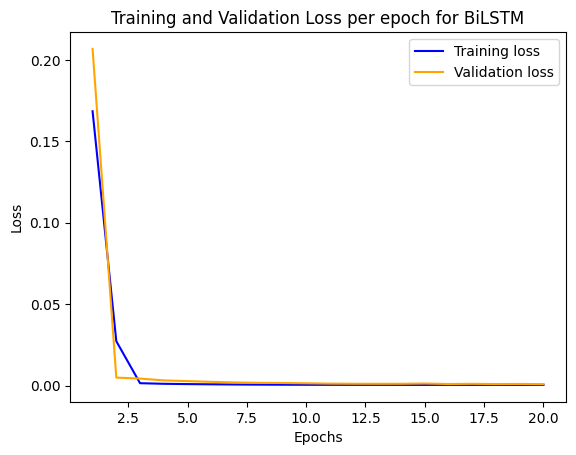

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                336       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_microsoft, y_train_microsoft, validation_data=(X_test_microsoft, y_test_microsoft), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 4s 47ms/step - loss: 0.3007 - root_mean_squared_error: 0.5483 - mae: 0.5104 - mape: 102.5756 - val_loss: 0.6732 - val_root_mean_squared_error: 0.8205 - val_mae: 0.8133 - val_mape: 100.1077
Epoch 2/20
39/39 [==============================] - 1s 23ms/step - loss: 0.2794 - root_mean_squared_error: 0.5286 - mae: 0.4916 - mape: 98.6659 - val_loss: 0.6590 - val_root_mean_squared_error: 0.8118 - val_mae: 0.8046 - val_mape: 99.0326
Epoch 3/20
39/39 [==============================] - 1s 22ms/step - loss: 0.2753 - root_mean_squared_error: 0.5247 - mae: 0.4876 - mape: 97.7212 - val_loss: 0.6528 - val_root_mean_squared_error: 0.8080 - val_mae: 0.8008 - val_mape: 98.5541
Epoch 4/20
39/39 [==============================] - 1s 22ms/step - loss: 0.2716 - root_mean_squared_error: 0.5212 - mae: 0.4837 - mape: 96.8039 - val_loss: 0.6467 - val_root_mean_squared_error: 0.8042 - val_mae: 0.7970 - val_mape: 98.0756
Epoch 5/20
39/39 [========================

In [ ]:
model_MLP = load_model('model_MLP/')

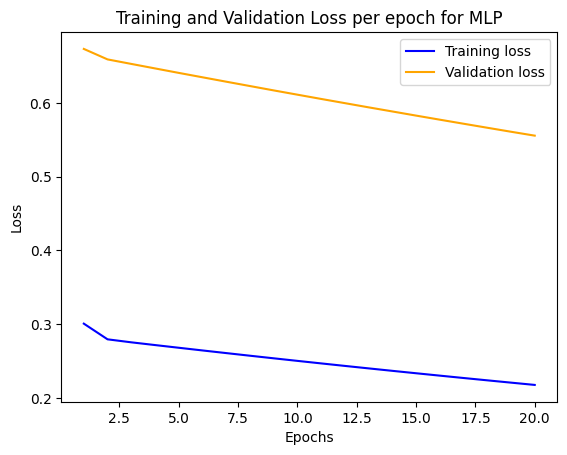

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_1 (ConvLSTM1D)  (None, 18, 32)            12800     
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_25 (Dense)            (None, 32)                18464     
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 319

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_microsoft_conv = X_train_microsoft.reshape(-1, 1, window_size, 1)
X_test_microsoft_conv = X_test_microsoft.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_microsoft_conv, y_train_microsoft, validation_data=(X_test_microsoft_conv, y_test_microsoft), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 10s 156ms/step - loss: 0.2582 - root_mean_squared_error: 0.5081 - mae: 0.4716 - mape: 94.4482 - val_loss: 0.5508 - val_root_mean_squared_error: 0.7422 - val_mae: 0.7352 - val_mape: 90.4315
Epoch 2/20
39/39 [==============================] - 4s 97ms/step - loss: 0.1935 - root_mean_squared_error: 0.4399 - mae: 0.4034 - mape: 79.5364 - val_loss: 0.4072 - val_root_mean_squared_error: 0.6381 - val_mae: 0.6313 - val_mape: 77.5496
Epoch 3/20
39/39 [==============================] - 4s 96ms/step - loss: 0.1220 - root_mean_squared_error: 0.3492 - mae: 0.3127 - mape: 59.9979 - val_loss: 0.2381 - val_root_mean_squared_error: 0.4879 - val_mae: 0.4814 - val_mape: 58.9929
Epoch 4/20
39/39 [==============================] - 5s 120ms/step - loss: 0.0520 - root_mean_squared_error: 0.2281 - mae: 0.1893 - mape: 33.5547 - val_loss: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mae: 0.2905 - val_mape: 35.3773
Epoch 5/20
39/39 [=======================

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM/')

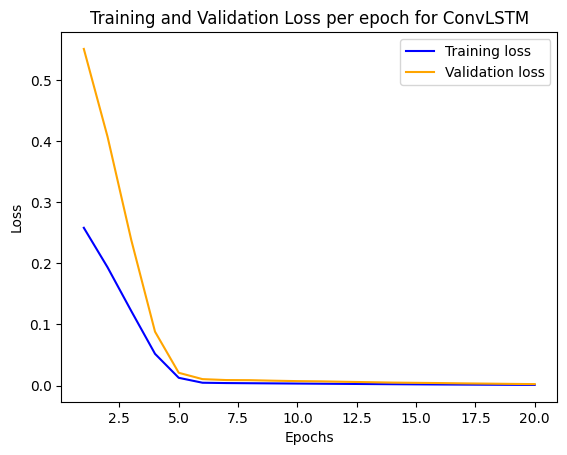

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 18, 64)         256       
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_29 (Dense)            (None, 64)                73792     
                                                                 
 dense_30 (Dense)            (None, 8)                 520       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_microsoft_conv = X_train_microsoft.reshape(-1, 1, window_size, 1)
X_test_microsoft_conv = X_test_microsoft.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_microsoft_conv, y_train_microsoft, validation_data=(X_test_microsoft_conv, y_test_microsoft), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 3s 52ms/step - loss: 0.1580 - root_mean_squared_error: 0.3975 - mae: 0.3633 - mape: 73.0943 - val_loss: 0.1719 - val_root_mean_squared_error: 0.4146 - val_mae: 0.4102 - val_mape: 50.4341
Epoch 2/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0287 - root_mean_squared_error: 0.1693 - mae: 0.1430 - mape: 27.7231 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200 - val_mae: 0.1152 - val_mape: 14.0336
Epoch 3/20
39/39 [==============================] - 3s 68ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - mae: 0.0270 - mape: 5.4539 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377 - val_mae: 0.0319 - val_mape: 3.9110
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 6.9871e-04 - root_mean_squared_error: 0.0264 - mae: 0.0220 - mape: 5.2550 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mae: 0.0353 - val_mape: 4.3008
Epoch 5/20
39/39 [===========================

In [ ]:
model_Conv = load_model('model_Conv/')

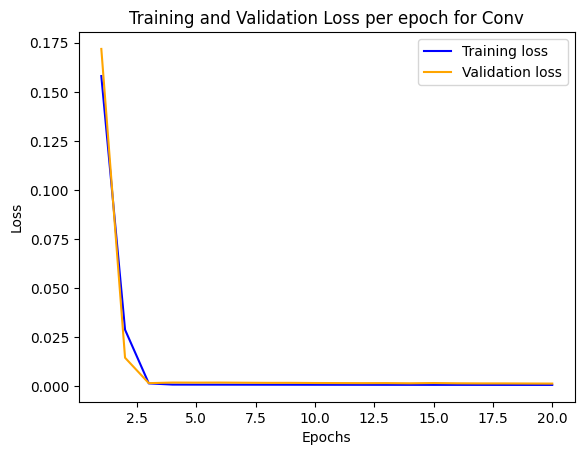

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.6.1.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_microsoft = np.asarray(microsoft_adj_close_normal[len(microsoft_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_microsoft_conv = X_pred_microsoft.reshape(1,1,window_size,1)

print(X_pred_microsoft)
print(X_pred_microsoft_conv)

[[[0.98622937]
  [0.98931271]
  [1.        ]
  [0.98993989]
  [0.99009666]
  [0.97859942]
  [0.96456755]
  [0.97339947]
  [0.96367906]
  [0.9692971 ]
  [0.97786778]
  [0.97021159]
  [0.97825972]
  [0.97823356]
  [0.95617973]
  [0.96872223]
  [0.97373917]
  [0.97533315]
  [0.96843476]
  [0.97012746]]]
[[[[0.98622937]
   [0.98931271]
   [1.        ]
   [0.98993989]
   [0.99009666]
   [0.97859942]
   [0.96456755]
   [0.97339947]
   [0.96367906]
   [0.9692971 ]
   [0.97786778]
   [0.97021159]
   [0.97825972]
   [0.97823356]
   [0.95617973]
   [0.96872223]
   [0.97373917]
   [0.97533315]
   [0.96843476]
   [0.97012746]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_microsoft)
pred_LSTM = model_LSTM.predict(X_pred_microsoft)
pred_BiLSTM = model_BiLSTM.predict(X_pred_microsoft)
pred_MLP = model_MLP.predict(X_pred_microsoft)

pred_Conv = model_Conv.predict(X_pred_microsoft_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_microsoft_conv)


1/1 [==============================] - 1s 607ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')
print(f' max of microsoft: {max_microsoft}')


 GRU model prediction: [[0.98519176]]
 LSTM model prediction: [[0.7592759]]
 BiLSTM model prediction: [[0.98519176]]
 MLP model prediction: [[0.07475165]]
 Conv model prediction: [[0.9642932]]
 ConvLSTM model prediction: [[0.9327794]]
 max of microsoft: 382.7000122


## **2.7 Apple Stock Prediction**

### **2.7.1 Training on Normalized Data**

#### **2.7.1.1 Data Preprocessing**

In [ ]:
apple_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[28]]
max_apple = max(apple_adj_close)
apple_adj_close_normal = apple_adj_close/np.max(apple_adj_close)
apple_adj_close_normal

1/4/2018      0.206476
1/5/2018      0.208827
1/8/2018      0.208051
1/9/2018      0.208027
1/10/2018     0.207979
                ...   
12/15/2023    0.997274
12/18/2023    0.988794
12/19/2023    0.994094
12/20/2023    0.983444
12/21/2023    0.985008
Name: (AAPL, Adj Close), Length: 1502, dtype: float64

In [ ]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.asarray(X), np.asarray(y)

window_size = 20
X_apple, y_apple = df_to_X_y(apple_adj_close_normal , window_size)

cv_n_splits = 5
tss = model_selection.TimeSeriesSplit(n_splits = cv_n_splits)

for train_index, test_index in tss.split(X_apple):
    pass
    # print("Train:", train_index)
X_train_apple, X_test_apple = X_apple[train_index], X_apple[test_index]
y_train_apple, y_test_apple = y_apple[train_index], y_apple[test_index]

In [ ]:
seed_value = 5
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

X_train_apple.shape

(1235, 20, 1)

#### **2.7.1.2 LSTM Model Training**

In [ ]:
model_LSTM = Sequential()
input1 = Input(shape=(window_size,1))
LSTM1 = LSTM(20)
Dense1 = Dense(8, activation='relu')
Dense2 = Dense(1, activation='linear')
model_LSTM.add(input1)
model_LSTM.add(LSTM1)
model_LSTM.add(Dense1)
model_LSTM.add(Dense2)

model_LSTM.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20)                1760      
                                                                 
 dense_32 (Dense)            (None, 8)                 168       
                                                                 
 dense_33 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1937 (7.57 KB)
Trainable params: 1937 (7.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model_LSTM/', save_best_only=True)
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
history_LSTM = model_LSTM.fit(X_train_apple, y_train_apple, validation_data=(X_test_apple, y_test_apple), epochs=20, callbacks=[cp])

Epoch 1/20
39/39 [==============================] - 8s 129ms/step - loss: 0.3062 - root_mean_squared_error: 0.5534 - mae: 0.4991 - mape: 101.5358 - val_loss: 0.7376 - val_root_mean_squared_error: 0.8589 - val_mae: 0.8542 - val_mape: 98.7533
Epoch 2/20
39/39 [==============================] - 7s 172ms/step - loss: 0.2654 - root_mean_squared_error: 0.5152 - mae: 0.4621 - mape: 93.1806 - val_loss: 0.6390 - val_root_mean_squared_error: 0.7994 - val_mae: 0.7949 - val_mape: 91.8679
Epoch 3/20
39/39 [==============================] - 5s 132ms/step - loss: 0.2216 - root_mean_squared_error: 0.4707 - mae: 0.4197 - mape: 83.8334 - val_loss: 0.5310 - val_root_mean_squared_error: 0.7287 - val_mae: 0.7243 - val_mape: 83.6794
Epoch 4/20
39/39 [==============================] - 6s 165ms/step - loss: 0.1741 - root_mean_squared_error: 0.4173 - mae: 0.3687 - mape: 72.6346 - val_loss: 0.4154 - val_root_mean_squared_error: 0.6445 - val_mae: 0.6401 - val_mape: 73.9005
Epoch 5/20
39/39 [=====================

In [ ]:
model_LSTM = load_model('model_LSTM/')

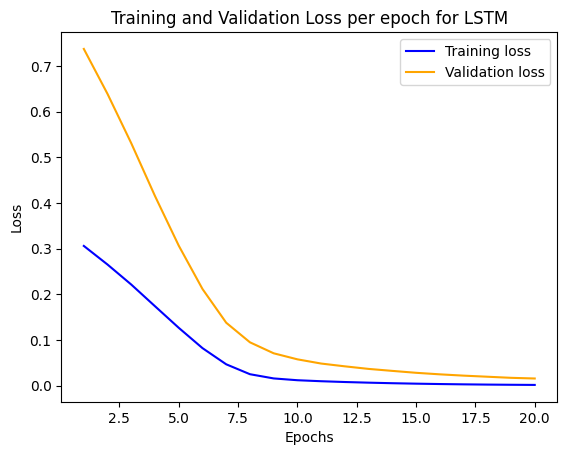

In [ ]:
loss_values = history_LSTM.history['loss']
val_loss_values = history_LSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.3 GRU Model Training**

In [ ]:
model_GRU = Sequential()
input1_GRU = Input(shape=(window_size,1))
GRU1 = GRU(64)
Dense1_GRU = Dense(8, activation='relu')
Dense2_GRU = Dense(1, activation='linear')
model_GRU.add(input1_GRU)
model_GRU.add(GRU1)
model_GRU.add(Dense1_GRU)
model_GRU.add(Dense2_GRU)

model_GRU.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only=True)
model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_GRU = model_GRU.fit(X_train_apple, y_train_apple, validation_data=(X_test_apple, y_test_apple), epochs=20, callbacks=[cp_GRU])

Epoch 1/20
39/39 [==============================] - 7s 119ms/step - loss: 0.1907 - root_mean_squared_error: 0.4367 - mae: 0.3907 - mape: 78.6396 - val_loss: 0.4157 - val_root_mean_squared_error: 0.6448 - val_mae: 0.6409 - val_mape: 74.0482
Epoch 2/20
39/39 [==============================] - 7s 193ms/step - loss: 0.1208 - root_mean_squared_error: 0.3475 - mae: 0.3008 - mape: 57.6045 - val_loss: 0.2544 - val_root_mean_squared_error: 0.5044 - val_mae: 0.5007 - val_mape: 57.7821
Epoch 3/20
39/39 [==============================] - 4s 110ms/step - loss: 0.0566 - root_mean_squared_error: 0.2379 - mae: 0.1894 - mape: 32.3317 - val_loss: 0.0994 - val_root_mean_squared_error: 0.3152 - val_mae: 0.3117 - val_mape: 35.8530
Epoch 4/20
39/39 [==============================] - 5s 125ms/step - loss: 0.0136 - root_mean_squared_error: 0.1167 - mae: 0.0956 - mape: 20.6695 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096 - val_mae: 0.1050 - val_mape: 11.9127
Epoch 5/20
39/39 [======================

In [ ]:
model_GRU = load_model('model_GRU/')

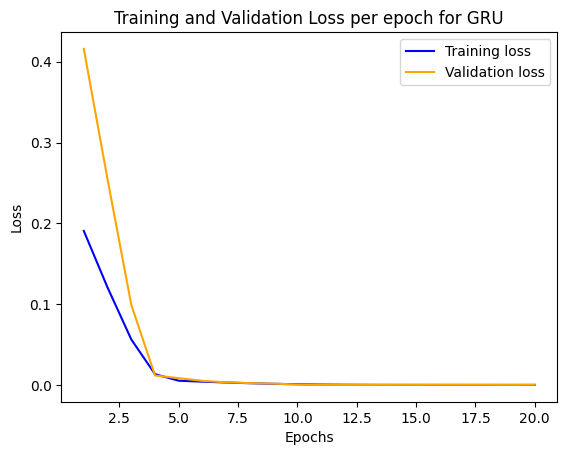

In [ ]:
loss_values = history_GRU.history['loss']
val_loss_values = history_GRU.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.4 BiLSTM Model Training**

In [ ]:
model_BiLSTM = Sequential()
input1_BiLSTM = Input(shape=(window_size,1))
BiLSTM1 = Bidirectional(LSTM(64, return_sequences=True))
BiLSTM2 = Bidirectional(LSTM(32))
Dense1_BiLSTM = Dense(8, activation='relu')
Dense2_BiLSTM = Dense(1, activation='linear')
model_BiLSTM.add(input1_BiLSTM)
model_BiLSTM.add(BiLSTM1)
model_BiLSTM.add(BiLSTM2)
model_BiLSTM.add(Dense1_BiLSTM)
model_BiLSTM.add(Dense2_BiLSTM)

model_BiLSTM.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_36 (Dense)            (None, 8)                 520       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 75537 (295.07 KB)
Trainable params: 75537 (295.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_BiLSTM = ModelCheckpoint('model_BiLSTM/', save_best_only=True)
model_BiLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_BiLSTM = model_BiLSTM.fit(X_train_apple, y_train_apple, validation_data=(X_test_apple, y_test_apple), epochs=20, callbacks=[cp_BiLSTM])

Epoch 1/20
39/39 [==============================] - 42s 854ms/step - loss: 0.1757 - root_mean_squared_error: 0.4192 - mae: 0.3711 - mape: 74.7496 - val_loss: 0.2358 - val_root_mean_squared_error: 0.4856 - val_mae: 0.4821 - val_mape: 55.6513
Epoch 2/20
39/39 [==============================] - 28s 732ms/step - loss: 0.0299 - root_mean_squared_error: 0.1729 - mae: 0.1284 - mape: 23.7691 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773 - val_mae: 0.0711 - val_mape: 8.0232
Epoch 3/20
39/39 [==============================] - 29s 772ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - mae: 0.0390 - mape: 12.0754 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666 - val_mae: 0.0604 - val_mape: 6.8248
Epoch 4/20
39/39 [==============================] - 28s 723ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - mae: 0.0328 - mape: 9.6451 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577 - val_mae: 0.0515 - val_mape: 5.8291
Epoch 5/20
39/39 [======================

In [ ]:
model_BiLSTM = load_model('model_GRU/')

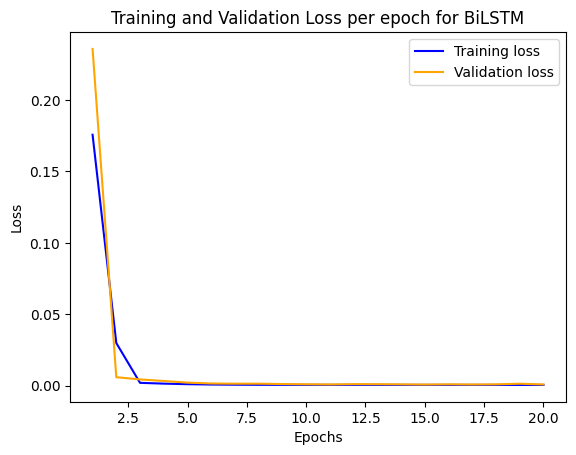

In [ ]:
loss_values = history_BiLSTM.history['loss']
val_loss_values = history_BiLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.5 MLP Model Training**

In [ ]:
model_MLP = Sequential()
input_MLP = Input(shape=(window_size,1))
flatten_MLP = Flatten()
Dense1_MLP = Dense(16, activation='relu')
Dense2_MLP = Dense(8, activation='relu')
Dense3_MLP = Dense(1, activation='linear')

model_MLP.add(input_MLP)
model_MLP.add(flatten_MLP)
model_MLP.add(Dense1_MLP)
model_MLP.add(Dense2_MLP)
model_MLP.add(Dense3_MLP)


model_MLP.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 20)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                336       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_MLP = ModelCheckpoint('model_MLP/', save_best_only=True)
model_MLP.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
history_MLP = model_MLP.fit(X_train_apple, y_train_apple, validation_data=(X_test_apple, y_test_apple), epochs=20, callbacks=[cp_MLP])

Epoch 1/20
39/39 [==============================] - 2s 27ms/step - loss: 0.3119 - root_mean_squared_error: 0.5585 - mae: 0.5038 - mape: 102.5055 - val_loss: 0.7590 - val_root_mean_squared_error: 0.8712 - val_mae: 0.8665 - val_mape: 100.1813
Epoch 2/20
39/39 [==============================] - 1s 21ms/step - loss: 0.2901 - root_mean_squared_error: 0.5386 - mae: 0.4852 - mape: 98.5157 - val_loss: 0.7428 - val_root_mean_squared_error: 0.8619 - val_mae: 0.8572 - val_mape: 99.0979
Epoch 3/20
39/39 [==============================] - 1s 28ms/step - loss: 0.2860 - root_mean_squared_error: 0.5347 - mae: 0.4811 - mape: 97.4672 - val_loss: 0.7363 - val_root_mean_squared_error: 0.8581 - val_mae: 0.8534 - val_mape: 98.6529
Epoch 4/20
39/39 [==============================] - 1s 32ms/step - loss: 0.2823 - root_mean_squared_error: 0.5313 - mae: 0.4773 - mape: 96.4469 - val_loss: 0.7298 - val_root_mean_squared_error: 0.8543 - val_mae: 0.8496 - val_mape: 98.2066
Epoch 5/20
39/39 [========================

In [ ]:
model_MLP = load_model('model_MLP/')

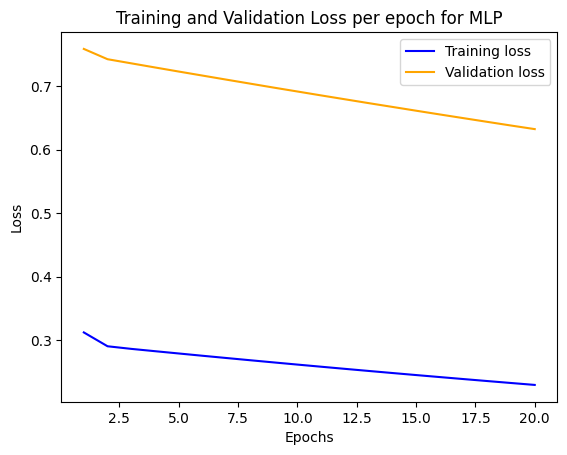

In [ ]:
loss_values = history_MLP.history['loss']
val_loss_values = history_MLP.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.6 ConvLSTM Model Training**

In [ ]:
model_ConvLSTM = Sequential()
input_ConvLSTM = Input(shape=(1,window_size,1))
ConvLSTM = ConvLSTM1D(filters=32, kernel_size=3)
flatten1 = Flatten()
Dense1_ConvLSTM = Dense(32, activation='relu')
Dense2_ConvLSTM = Dense(16, activation='relu')
Dense3_ConvLSTM = Dense(8, activation='relu')
Dense4_ConvLSTM = Dense(1, activation='linear')


model_ConvLSTM.add(input_ConvLSTM)
model_ConvLSTM.add(ConvLSTM)
model_ConvLSTM.add(flatten1)
model_ConvLSTM.add(Dense1_ConvLSTM)
model_ConvLSTM.add(Dense2_ConvLSTM)
model_ConvLSTM.add(Dense3_ConvLSTM)
model_ConvLSTM.add(Dense4_ConvLSTM)

model_ConvLSTM.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_2 (ConvLSTM1D)  (None, 18, 32)            12800     
                                                                 
 flatten_7 (Flatten)         (None, 576)               0         
                                                                 
 dense_41 (Dense)            (None, 32)                18464     
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31937 (124.75 KB)
Trainable params: 319

In [ ]:
cp_ConvLSTM = ModelCheckpoint('model_ConvLSTM/', save_best_only=True)
model_ConvLSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mae','mape'])

In [ ]:
X_train_apple_conv = X_train_apple.reshape(-1, 1, window_size, 1)
X_test_apple_conv = X_test_apple.reshape(-1, 1, window_size, 1)

history_ConvLSTM = model_ConvLSTM.fit(X_train_apple_conv, y_train_apple, validation_data=(X_test_apple_conv, y_test_apple), epochs=20, callbacks=[cp_ConvLSTM])

Epoch 1/20
39/39 [==============================] - 12s 155ms/step - loss: 0.2659 - root_mean_squared_error: 0.5156 - mae: 0.4632 - mape: 93.7211 - val_loss: 0.6055 - val_root_mean_squared_error: 0.7781 - val_mae: 0.7736 - val_mape: 89.3974
Epoch 2/20
39/39 [==============================] - 4s 107ms/step - loss: 0.1910 - root_mean_squared_error: 0.4371 - mae: 0.3855 - mape: 75.8527 - val_loss: 0.4142 - val_root_mean_squared_error: 0.6436 - val_mae: 0.6393 - val_mape: 73.8094
Epoch 3/20
39/39 [==============================] - 4s 102ms/step - loss: 0.1062 - root_mean_squared_error: 0.3258 - mae: 0.2756 - mape: 51.1959 - val_loss: 0.2024 - val_root_mean_squared_error: 0.4499 - val_mae: 0.4459 - val_mape: 51.3842
Epoch 4/20
39/39 [==============================] - 5s 138ms/step - loss: 0.0356 - root_mean_squared_error: 0.1886 - mae: 0.1450 - mape: 24.3577 - val_loss: 0.0529 - val_root_mean_squared_error: 0.2299 - val_mae: 0.2256 - val_mape: 25.8450
Epoch 5/20
39/39 [=====================

In [ ]:
model_ConvLSTM = load_model('model_ConvLSTM/')

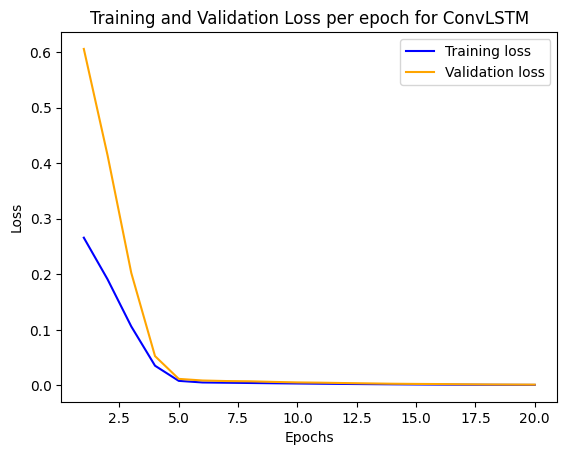

In [ ]:
loss_values = history_ConvLSTM.history['loss']
val_loss_values = history_ConvLSTM.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for ConvLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.7 CNN Model Training**

In [ ]:
model_Conv = Sequential()
input_Conv = Input(shape=(1,window_size,1))
Conv1 = Conv1D(filters=64, kernel_size=3)
flatten_conv = Flatten()
Dense1_Conv = Dense(64, activation='relu')
Dense2_Conv = Dense(8, activation='relu')
Dense3_Conv = Dense(1, activation='linear')


model_Conv.add(input_Conv)
model_Conv.add(Conv1)
model_Conv.add(flatten_conv)
model_Conv.add(Dense1_Conv)
model_Conv.add(Dense2_Conv)
model_Conv.add(Dense3_Conv)

model_Conv.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 18, 64)         256       
                                                                 
 flatten_8 (Flatten)         (None, 1152)              0         
                                                                 
 dense_45 (Dense)            (None, 64)                73792     
                                                                 
 dense_46 (Dense)            (None, 8)                 520       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 74577 (291.32 KB)
Trainable params: 74577 (291.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp_Conv = ModelCheckpoint('model_Conv/', save_best_only=True)
model_Conv.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'mae', 'mape'])

In [ ]:
X_train_apple_conv = X_train_apple.reshape(-1, 1, window_size, 1)
X_test_apple_conv = X_test_apple.reshape(-1, 1, window_size, 1)

history_Conv = model_Conv.fit(X_train_apple_conv, y_train_apple, validation_data=(X_test_apple_conv, y_test_apple), epochs=20, callbacks=[cp_Conv])

Epoch 1/20
39/39 [==============================] - 3s 48ms/step - loss: 0.1636 - root_mean_squared_error: 0.4045 - mae: 0.3582 - mape: 72.8772 - val_loss: 0.1921 - val_root_mean_squared_error: 0.4383 - val_mae: 0.4354 - val_mape: 50.3048
Epoch 2/20
39/39 [==============================] - 2s 44ms/step - loss: 0.0287 - root_mean_squared_error: 0.1694 - mae: 0.1338 - mape: 25.6439 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868 - val_mae: 0.0813 - val_mape: 9.3250
Epoch 3/20
39/39 [==============================] - 2s 42ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - mae: 0.0281 - mape: 7.1235 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mae: 0.0310 - val_mape: 3.6019
Epoch 4/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - mae: 0.0259 - mape: 6.6599 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mae: 0.0357 - val_mape: 4.1318
Epoch 5/20
39/39 [==============================]

In [ ]:
model_Conv = load_model('model_Conv/')

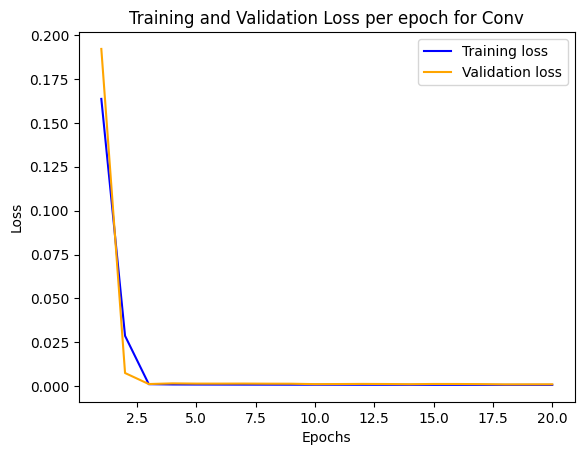

In [ ]:
loss_values = history_Conv.history['loss']
val_loss_values = history_Conv.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss per epoch for Conv')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **2.7.1.8 Stock Price Prediction Using Trained Models**

In [ ]:
X_pred_apple = np.asarray(apple_adj_close_normal[len(apple_adj_close_normal)-20:]).reshape(1,window_size,1)
X_pred_apple_conv = X_pred_apple.reshape(1,1,window_size,1)

print(X_pred_apple)
print(X_pred_apple_conv)

[[[0.95891172]
  [0.95800309]
  [0.96108219]
  [0.95588307]
  [0.95881074]
  [0.96532232]
  [0.95618592]
  [0.97632627]
  [0.97077385]
  [0.98061685]
  [0.98788555]
  [0.9751148 ]
  [0.98283785]
  [0.99924288]
  [1.        ]
  [0.99727428]
  [0.9887941 ]
  [0.9940942 ]
  [0.98344355]
  [0.98500832]]]
[[[[0.95891172]
   [0.95800309]
   [0.96108219]
   [0.95588307]
   [0.95881074]
   [0.96532232]
   [0.95618592]
   [0.97632627]
   [0.97077385]
   [0.98061685]
   [0.98788555]
   [0.9751148 ]
   [0.98283785]
   [0.99924288]
   [1.        ]
   [0.99727428]
   [0.9887941 ]
   [0.9940942 ]
   [0.98344355]
   [0.98500832]]]]


In [ ]:
pred_GRU = model_GRU.predict(X_pred_apple)
pred_LSTM = model_LSTM.predict(X_pred_apple)
pred_BiLSTM = model_BiLSTM.predict(X_pred_apple)
pred_MLP = model_MLP.predict(X_pred_apple)

pred_Conv = model_Conv.predict(X_pred_apple_conv)
pred_ConvLSTM = model_ConvLSTM.predict(X_pred_apple_conv)


1/1 [==============================] - 0s 346ms/step


In [ ]:
print(f' GRU model prediction: {pred_GRU}')
print(f' LSTM model prediction: {pred_LSTM}')
print(f' BiLSTM model prediction: {pred_BiLSTM}')
print(f' MLP model prediction: {pred_MLP}')
print(f' Conv model prediction: {pred_Conv}')
print(f' ConvLSTM model prediction: {pred_ConvLSTM}')
print(f' max of apple: {max_apple}')


 GRU model prediction: [[1.0028354]]
 LSTM model prediction: [[0.7896295]]
 BiLSTM model prediction: [[1.0028354]]
 MLP model prediction: [[0.07462461]]
 Conv model prediction: [[0.97608745]]
 ConvLSTM model prediction: [[0.9585056]]
 max of apple: 198.1100006


## **2.8 Naïve Forecasting for Google Stock**

In [ ]:
# loading imputed version of main tickers data from google drive
drive.mount('/content/drive')
main_tickers_data_imputed = pd.read_csv('/content/drive/MyDrive/main_tickers_data.csv', index_col=0, header=[0, 1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
google_adj_close = main_tickers_data_imputed[main_tickers_data_imputed.columns[4]]
max_google = max(google_adj_close)
google_adj_close_normal = google_adj_close/np.max(google_adj_close)
google_adj_close_normal

1/4/2018      0.365647
1/5/2018      0.370496
1/8/2018      0.371804
1/9/2018      0.371330
1/10/2018     0.370446
                ...   
12/15/2023    0.884953
12/18/2023    0.906309
12/19/2023    0.911982
12/20/2023    0.923261
12/21/2023    0.930001
Name: (GOOGL, Adj Close), Length: 1502, dtype: float64

In [ ]:
data = google_adj_close_normal
naive_forecast = pd.Series(data).shift(1)
print(naive_forecast)

1/4/2018           NaN
1/5/2018      0.365647
1/8/2018      0.370496
1/9/2018      0.371804
1/10/2018     0.371330
                ...   
12/15/2023    0.880548
12/18/2023    0.884953
12/19/2023    0.906309
12/20/2023    0.911982
12/21/2023    0.923261
Name: (GOOGL, Adj Close), Length: 1502, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(data.iloc[1:], naive_forecast.iloc[1:])
mae = mean_absolute_error(data.iloc[1:], naive_forecast.iloc[1:])
mape = np.mean(np.abs((data.iloc[1:] - naive_forecast.iloc[1:] / data.iloc[1:])) * 100)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 0.0001514392791436694
MAE: 0.008449824961761183
MAPE: 39.17439415413493
